In [661]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table

In [662]:
# Read the table
t1 = Table.read('Tgas200_Wright2003_2MASS_FinCat_out.vot',format='votable')
print(t1.colnames)
Source = t1["Source"]
Gmags = t1["X.Gmag."]
Vmags = t1["VTmag"]
Jmags = t1["Jmag"]
Hmags = t1["Hmag"]
Kmags = t1["Kmag"]
QFlags = t1["Qfl"]
d1 = t1["angDist"]
d2 = t1["d_arcsec"]
Wdist = t1["Dist"]
print("Finished reading Table. Read ",len(Jmags)," sources")

['col1', 'angDist', 'd_arcsec', 'X_RAJ2000', 'X_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'X.FG.', 'e_.FG.', 'X.Gmag.', 'Var', 'X_RAJ2000.1', 'X_DEJ2000.1', 'TYC1', 'TYC2.1', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', 'X2MASS', 'RAJ2000.1', 'DEJ2000.1', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']
Finished reading Table. Read  50093  sources


Use the Dup flag in the GAIA catalog to mask sources which have nearby neighbors in GAIA which complicated the measurements. Dup=0 is the good value.

In [625]:
GAIA_Dup = t1["Dup"]
for i in range(0,len(GAIA_Dup)):
    if(GAIA_Dup.mask[i] == False):
        if(GAIA_Dup[i] > 0.5):
            row = t1[i]
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking sources with GAIA Dup flag of 1 or greater")
test = GAIA_Dup.compressed()
print("   Remaining number of sources: ",len(test))

Finished masking sources with GAIA Dup flag of 1 or greater
   Remaining number of sources:  50093


Look at the number of duplicate matches --- places were one than 1 GAIA source matches with a 2MASS source or where 1 2MASS source matches with more than one GAIA source

In [626]:
Test = Source.compressed()
unique = set()
Gdups = set()

for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("GAIA Duplicate Source: ",Test[i])
        Gdups.add(Test[i])
    else:
        unique.add(Test[i])
print("Finished GAIA Duplicate Check. Found: ", len(Gdups))

for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        Name = Source[i]
        if(Name in Gdups):
            row = t1[i]
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking all GAIA duplicates. All sources involved")
TwoM = t1["X2MASS"]
unique = set()
Tdups = set()
Test = TwoM.compressed()
for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("2MASS Duplicate Source: ",Test[i])
        Tdups.add(Test[i])
    else:
        unique.add(Test[i])
print("Finished 2MASS Duplicate Check. Found: ", len(Tdups))

for i in range(0,len(TwoM)):
    if(Source.mask[i] == False):
        Name = TwoM[i]
        if(Name in Tdups):
            row = t1[i]
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking all 2MASS duplicates. All sources involved")
Test = Source.compressed()
print("Remaining valid sources: ",len(Test))

Finished GAIA Duplicate Check. Found:  0
Finished masking all GAIA duplicates. All sources involved
Finished 2MASS Duplicate Check. Found:  0
Finished masking all 2MASS duplicates. All sources involved
Remaining valid sources:  50093


Let's mask the 2MASS magnitudes that are really upper limites. We can do this using the Qfl value. It is a three letter code; one letter for each band: J, H,K. "A" is the best detection and "F is the worst. "U" means that there was no detection and the value is actually an upper limit. We will mask the J, H, K magnitude arrays according to the flags for each band with
D, E, F, and U masked.

Remember since I have done no arithematic with Jmags, Hmags, and Kmags, they are just pointers to the original table so I have actually masked the values in the table. If you were to pull out "Jmag" from the table again, it would now be flagged. The only way to go back to the original non-masked state is to read in the table again. I have done it this way on purpose.

In [574]:
# Use the 2MASS flags to mask the J, H, K magnitudes which are upper limits, or poor detections.
#   U = undetected, F, E, and D are poor detections

#for i in range(0,len(QFlags)):
#    if(QFlags[i][0] == ord("U")):
#        Jmags.mask[i] = True
#    if(QFlags[i][1] == ord("U")):
#        Hmags.mask[i] = True
#    if(QFlags[i][2] == ord("U")):
#        Kmags.mask[i] = True
#    if(QFlags[i][0] == ord("F")):
#        Jmags.mask[i] = True
#    if(QFlags[i][1] == ord("F")):
#        Hmags.mask[i] = True
#    if(QFlags[i][2] == ord("F")):
#        Kmags.mask[i] = True
#    if(QFlags[i][0] == ord("E")):
#        Jmags.mask[i] = True
#    if(QFlags[i][1] == ord("E")):
#        Hmags.mask[i] = True
#    if(QFlags[i][2] == ord("E")):
#        Kmags.mask[i] = True
#    if(QFlags[i][0] == ord("D")):
#        Jmags.mask[i] = True
#    if(QFlags[i][1] == ord("D")):
#        Hmags.mask[i] = True
#    if(QFlags[i][2] == ord("D")):
#        Kmags.mask[i] = True

# Or if you only want to keep the stars with "AAA" for their flags
for i in range(0,len(QFlags)):
    if(Source.mask[i] == False):
        if(QFlags[i][0] == ord("A")):
            Jmags.mask[i] = False
        else:
            Jmags.mask[i] = True
        if(QFlags[i][1] == ord("A")):
            Hmags.mask[i] = False
        else:
            Hmags.mask[i] = True
        if(QFlags[i][2] == ord("A")):
            Kmags.mask[i] = False
        else:
            Kmags.mask[i] = True
            
#       if(Jmags[i] > 10.5):
#            Jmags.mask[i] = True
#        if(Hmags[i] > 10.5):
#            Hmags.mask[i] = True
#        if(Kmags[i] > 10.5):
#            Kmags.mask[i] = True
            
print("Ended Flagging of 2MASS J, H, K magnitudes")


Ended Flagging of 2MASS J, H, K magnitudes


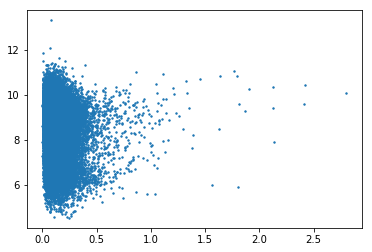

0.125526361692
0.0971624230702
Finished masking sources where the 2MASS - TGAS match was larger than 1.5
Remaining valid sources:  49975


In [575]:
plt.scatter(d1,Gmags,s=2.0)
plt.show()
print(np.mean(d1))
print(np.std(d1))
for i in range(0,len(d1)):
    if(Source.mask[i] == False):
        if(d1[i] > 1.5):
            row = t1[i]
            idx = row._index
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking sources where the 2MASS - TGAS match was larger than 1.5")
Test = Source.compressed()
print("Remaining valid sources: ",len(Test))

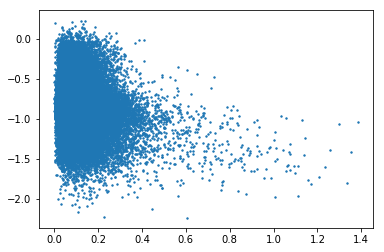

-0.861749541289
0.277725901685


In [663]:
JmG = Jmags - Gmags
plt.scatter(d1,JmG,s=2.0)
plt.show()
print(np.mean(JmG))
print(np.std(JmG))

We are going to use the mean J-G and 5 sigma to mask very large J-G values. These are either bad matches or extreme evolved stars which will not be useful for our analysis. These sources are entirely masked.

 Masked  17  rows based on J-G color > 5 sigma from mean


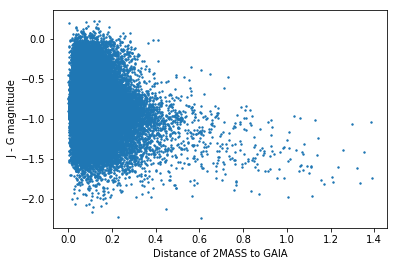

New sigma for J-G:  0.277472849853
Current number of valid Sources:  49958


In [577]:
imask = 0
for i in range(0,len(JmG)):
    if(abs(JmG[i] + 0.86) > 1.4):
        imask = imask + 1
        row = t1[i]
        idx = row._index
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
print(" Masked ",imask," rows based on J-G color > 5 sigma from mean")
JmG = Jmags - Gmags
plt.xlabel("Distance of 2MASS to GAIA")
plt.ylabel(" J - G magnitude")
plt.scatter(d1,JmG,s=2.0)
plt.show()
print("New sigma for J-G: ",np.std(JmG))
Test = Source.compressed()
print("Current number of valid Sources: ",len(Test))

Now lets look a J, H, K magnitude-magnitude diagrams and the color-color diagram to see how much better they look with the upper limits all removed for plotting.

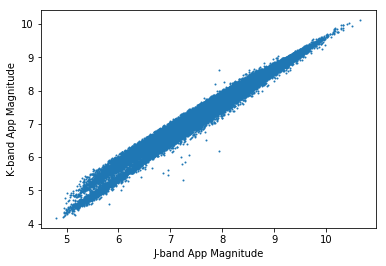

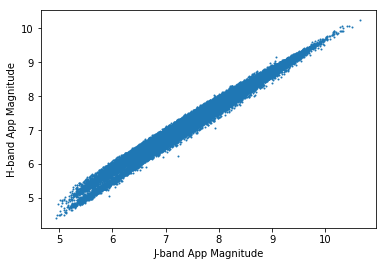

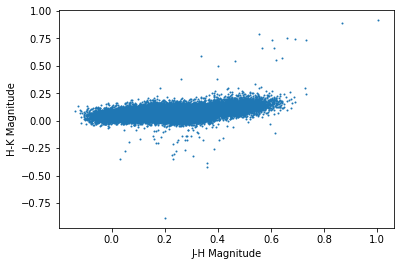

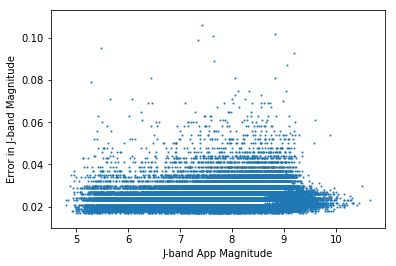

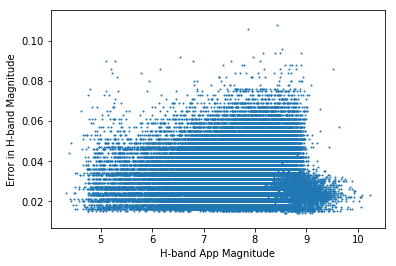

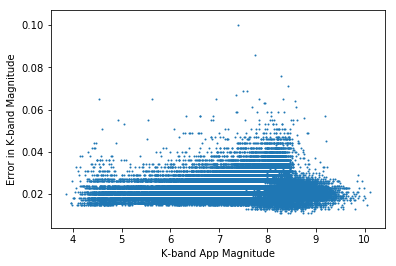

In [664]:
plt.xlabel("J-band App Magnitude")
plt.ylabel("K-band App Magnitude")
plt.scatter(Jmags,Kmags,s=1.0)
plt.show()
plt.xlabel("J-band App Magnitude")
plt.ylabel("H-band App Magnitude")
plt.scatter(Jmags,Hmags,s=1.0)
plt.show()
JmH = Jmags-Hmags
HmK = Hmags-Kmags
# plt.xlim(-1.,1.)
# plt.ylim(-1.,1.)
plt.xlabel("J-H Magnitude")
plt.ylabel("H-K Magnitude")
plt.scatter(JmH,HmK,s=1.0)
plt.show()
eJmags = t1["e_Jmag"]
eHmags = t1["e_Hmag"]
eKmags = t1["e_Kmag"]
plt.xlabel("J-band App Magnitude")
plt.ylabel("Error in J-band Magnitude")
plt.scatter(Jmags,eJmags,s=1.0)
plt.show()
plt.xlabel("H-band App Magnitude")
plt.ylabel("Error in H-band Magnitude")
plt.scatter(Hmags,eHmags,s=1.0)
plt.show()
plt.xlabel("K-band App Magnitude")
plt.ylabel("Error in K-band Magnitude")
plt.scatter(Kmags,eKmags,s=1.0)
plt.show()

Luminosity Class is often but not always given in the Wright et al Spectral Type column. The placement of the luminosity class within the spectral type is not consistent and sometimes there is more than one class (III/IV for example). There are also some that are designated as binaries with 2 spectral types given, generally with a "+" sign between then. The code below tried to deal with this by translative the ascii into a number representation for the class.
V becomes 5.0; III becomes 3.0; IV/V =4.5, etc. If there is no luminosity class given, I assigned 5.1 (assuming that it probably is V but so we can tell the difference from a real V).
Binary stars and stars with funky lumonsity/spectral designations are assigned a negative number.

In [665]:
#  Translate Spectra Type luminosity class into a number from 1 to 5
#     or a negative number if it is a binary or unknown spectral type.
#     Note that many stars do not have a luminosity class. There are given 5.1.
#
SpType = t1["SpType"]
SpTypeN = [0.0]*len(SpType)
for i in range(0,len(SpType)):
    if(SpType.mask[i] == False):
        SpT = SpType[i].decode()
        if(len(SpT) > 2):
            for j in range(0,len(SpT)):
                if(SpT[j] == 'I'):
                    SpTypeN[i] = SpTypeN[i] + 1
                if(SpT[j] == 'V'):
                    SpTypeN[i] = SpTypeN[i] + 5
                if(SpT[j] == '+'):
                    SpTypeN[i] = -20.
                
        else:
            SpTypeN[i] = 5.1
        
        if(SpTypeN[i] == 6):
            SpTypeN[i] = 4.
        if(SpTypeN[i] == 11):
            SpTypeN[i] = 4.5
        if(SpTypeN[i] == 9):
            SpTypeN[i] = 3.5
        if(SpTypeN[i] > 5.2):
            SpTypeN[i] = -30.
print("Finished Luminosity Class Translation")
count = 0
for i in range(0,len(SpType)):
    if(SpTypeN[i] < 0.):
        count = count + 1
test = SpType.compressed()
good = len(test) - count
print("  Number of single Stars: ",good,"  Binaries or Unknown luminosity class: ",count)


Finished Luminosity Class Translation
  Number of single Stars:  49670   Binaries or Unknown luminosity class:  423


In [667]:
print(SpTypeN[0:30])

[5.1, 5.1, 5.0, 5.1, 3.0, 5.1, 5.1, 5.1, 5.1, 5.0, 0.0, 5.1, 3.0, 5.1, 5.0, 5.1, 4.0, 5.1, 3.0, 3.5, 5.0, 5.1, 5.1, 5.0, 5.1, 5.1, 5.0, 5.1, 5.0, 5.0]


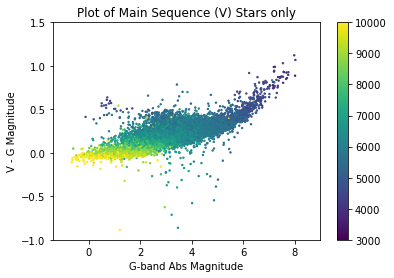

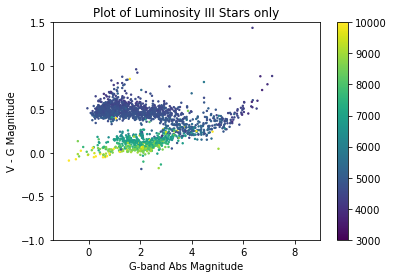

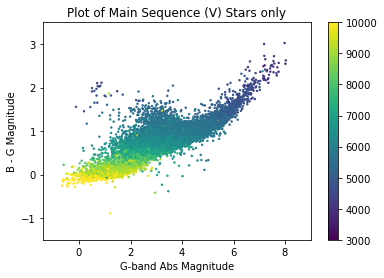

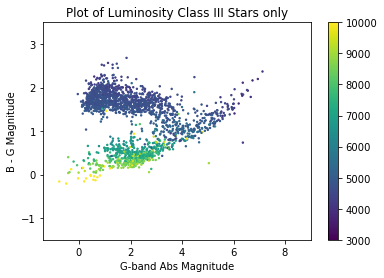

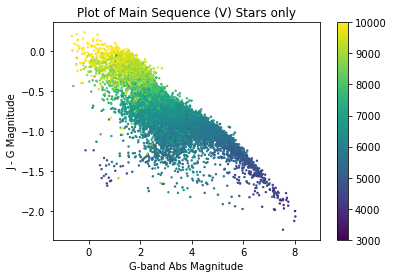

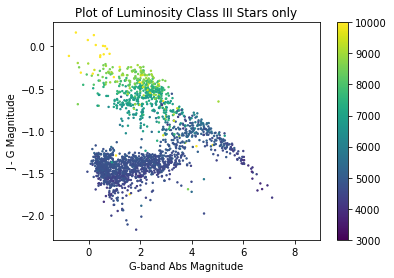

In [668]:
Dist = 1000./t1["Plx"]
Vmags = t1['VTmag'] + 5 - 5*np.log10(Dist)
Bmags = t1['BTmag'] + 5 - 5*np.log10(Dist)
Gmags = t1['X.Gmag.'] + 5 - 5*np.log10(Dist)
Jmags = t1['Jmag'] + 5 - 5 * np.log10(Dist)
Hmags = t1['Hmag'] + 5 - 5 * np.log10(Dist)
Kmags = t1['Kmag'] + 5 - 5 * np.log10(Dist)
Teff = t1["Teff"]
VmG = Vmags - Gmags
BmG = Bmags - Gmags
JmG = Jmags - Gmags
for i in range(0,len(VmG)):
    if(SpTypeN[i] > 4.9 and SpTypeN[i] < 5.05):
        VmG.mask[i] = False
    else:
        VmG.mask[i] = True
plt.xlim(-1.4,9)
plt.ylim(-1.0,1.5)
plt.title("Plot of Main Sequence (V) Stars only")
plt.xlabel("G-band Abs Magnitude")
plt.ylabel("V - G Magnitude")
plt.scatter(Gmags,VmG,s=2.0,c=Teff,vmin=3000,vmax=10000)
plt.colorbar()
plt.show()
for i in range(0,len(VmG)):
    if(SpTypeN[i] > 2.9 and SpTypeN[i] < 3.1):
        VmG.mask[i] = False
    else:
        VmG.mask[i] = True
plt.xlim(-1.4,9)
plt.ylim(-1.0,1.5)
plt.title("Plot of Luminosity III Stars only")
plt.xlabel("G-band Abs Magnitude")
plt.ylabel("V - G Magnitude")
plt.scatter(Gmags,VmG,s=2.0,c=Teff,vmin=3000,vmax=10000)
plt.colorbar()
plt.show()
for i in range(0,len(VmG)):
    if(SpTypeN[i] > 4.9 and SpTypeN[i] < 5.05):
        BmG.mask[i] = False
    else:
        BmG.mask[i] = True
plt.title("Plot of Main Sequence (V) Stars only")
plt.xlabel("G-band Abs Magnitude")
plt.ylabel("B - G Magnitude")
plt.xlim(-1.4,9.)
plt.ylim(-1.5,3.5)
plt.scatter(Gmags,BmG,s=2.0,c=Teff,vmin=3000,vmax=10000)
plt.colorbar()
plt.show()
for i in range(0,len(VmG)):
    if(SpTypeN[i] > 2.9 and SpTypeN[i] < 3.1):
        BmG.mask[i] = False
    else:
        BmG.mask[i] = True
plt.title("Plot of Luminosity Class III Stars only")
plt.xlabel("G-band Abs Magnitude")
plt.ylabel("B - G Magnitude")
plt.xlim(-1.4,9.)
plt.ylim(-1.5,3.5)
plt.scatter(Gmags,BmG,s=2.0,c=Teff,vmin=3000,vmax=10000)
plt.colorbar()
plt.show()

for i in range(0,len(JmG)):
    if(SpTypeN[i] > 4.9 and SpTypeN[i] < 5.05):
        JmG.mask[i] = False
        if(Jmags.mask[i] == True):
            JmG.mask[i] = True
    else:
        JmG.mask[i] = True
plt.title("Plot of Main Sequence (V) Stars only")
plt.xlabel("G-band Abs Magnitude")
plt.ylabel("J - G Magnitude")
plt.xlim(-1.4,9.)
#plt.ylim(-1.0,3.0)
plt.scatter(Gmags,JmG,s=2.0,c=Teff,vmin=3000,vmax=10000)
plt.colorbar()
plt.show()
for i in range(0,len(JmG)):
    if(SpTypeN[i] > 2.9 and SpTypeN[i] < 3.1):
        JmG.mask[i] = False
        if(Jmags.mask[i] == True):
            JmG.mask[i] = True
    else:
        JmG.mask[i] = True
plt.title("Plot of Luminosity Class III Stars only")
plt.xlabel("G-band Abs Magnitude")
plt.ylabel("J - G Magnitude")
plt.xlim(-1.4,9.)
#plt.ylim(-1.0,3.0)
plt.scatter(Gmags,JmG,s=2.0,c=Teff,vmin=3000,vmax=10000)
plt.colorbar()
plt.show()

[3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]


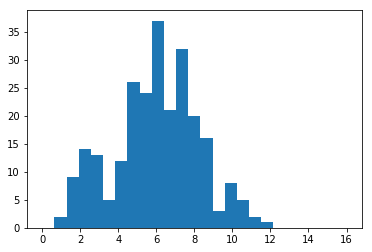

Number of stars in Teff= 3500 - 3999 : 250
     Median value:  5.99888
     Variance:      2.25884


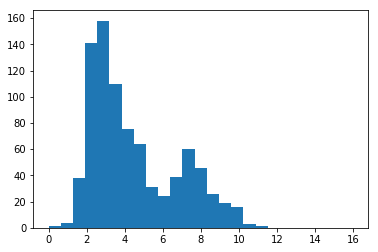

Number of stars in Teff= 4000 - 4499 : 856
     Median value:  4.4753
     Variance:      2.27617


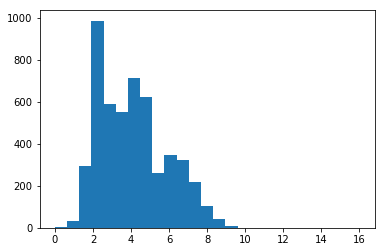

Number of stars in Teff= 4500 - 4999 : 5092
     Median value:  4.10137
     Variance:      1.76945


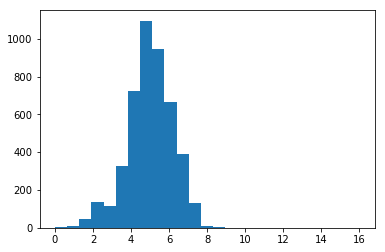

Number of stars in Teff= 5000 - 5499 : 4604
     Median value:  5.01077
     Variance:      1.18116


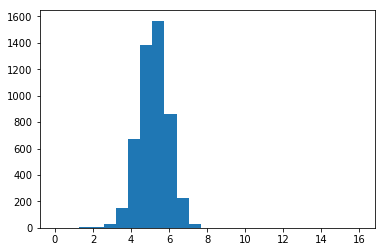

Number of stars in Teff= 5500 - 5999 : 4940
     Median value:  5.18754
     Variance:      0.768424


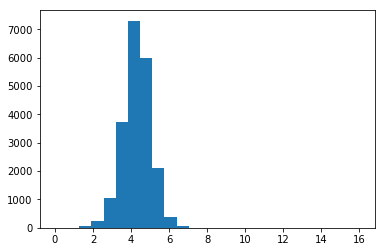

Number of stars in Teff= 6000 - 6499 : 20960
     Median value:  4.30606
     Variance:      0.728924


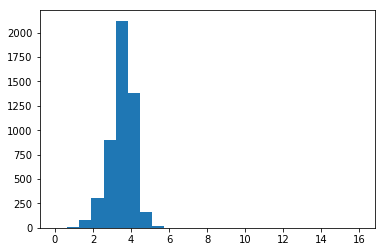

Number of stars in Teff= 6500 - 6999 : 4973
     Median value:  3.51584
     Variance:      0.62349


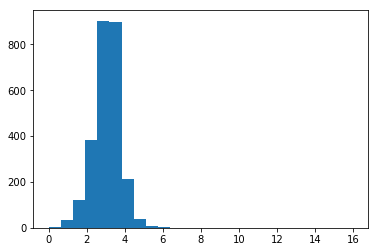

Number of stars in Teff= 7000 - 7499 : 2611
     Median value:  3.06162
     Variance:      0.711689


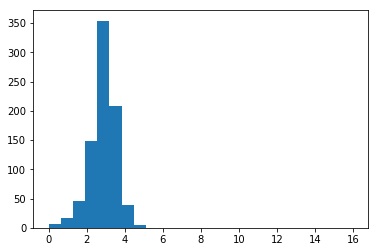

Number of stars in Teff= 7500 - 7999 : 824
     Median value:  2.86503
     Variance:      0.688594


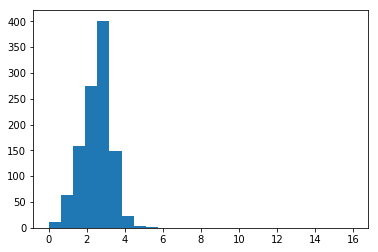

Number of stars in Teff= 8000 - 8499 : 1088
     Median value:  2.50826
     Variance:      0.775013


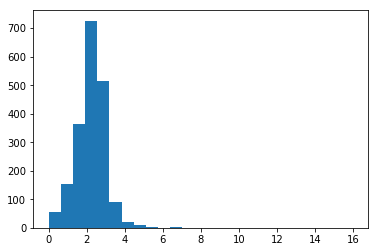

Number of stars in Teff= 8500 - 8999 : 1949
     Median value:  2.21778
     Variance:      0.775091


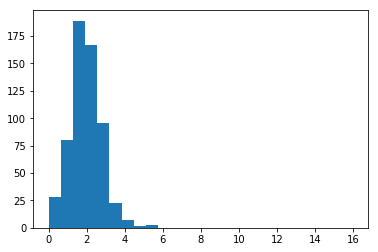

Number of stars in Teff= 9000 - 9499 : 599
     Median value:  1.96494
     Variance:      0.813199


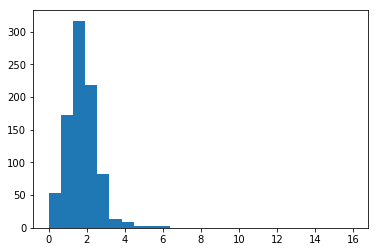

Number of stars in Teff= 9500 - 9999 : 882
     Median value:  1.73548
     Variance:      0.808376


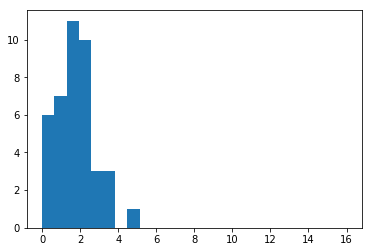

Number of stars in Teff= 10000 - 10499 : 43
     Median value:  1.67719
     Variance:      1.05244


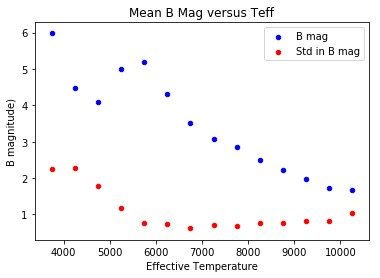

In [669]:
Teff = t1["Teff"]

temps = [3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000]
print(temps)
Tave = []
Bmean = []
Bstd = []

for tlow in temps:
    thi = tlow + 499.
    tmean = (thi+tlow)/2.0
    TeffMask = ma.masked_outside(Teff,tlow,thi)
    BMask = ma.array(Bmags,mask=TeffMask.mask)
    Bplt = ma.compressed(BMask)
    plt.hist(Bplt,bins=25,range=(0,16))
    plt.show()
    Tave.append(tmean)
    Bmean.append(np.mean(Bplt))
    Bstd.append(np.std(Bplt))
    print("Number of stars in Teff= %g - %g :"%(tlow,thi), TeffMask.count())
    print("     Median value: ", np.mean(Bplt))
    print("     Variance:     ",np.std(Bplt))

plt.title("Mean B Mag versus Teff")
plt.xlabel('Effective Temperature')
plt.ylabel('B magnitude)')
pllab1 = plt.scatter(Tave,Bmean,s=20,c='b', label='plt1')
pllab2 = plt.scatter(Tave,Bstd,s=20,c='r', label='plt2')
plt.legend([pllab1,pllab2],['B mag','Std in B mag'])
plt.show()

In [48]:
eGflux = t1["e__FG_"]
Gflux = t1["__FG_"]
Gmags = t1["__Gmag_"]
for i in range(0,len(Gflux)):
    SNR = Gflux[i]/eGflux[i]
    if(SNR < 20):
        print(Gflux[i],eGflux[i],SNR, Gmags[i])
print("Finished testing G-band SNR")

4715350.45069 297926.3987 15.8272327369 8.841
470609.26764 38319.77203 12.2811082298 11.343
9454890.22577 871081.47488 10.8541973379 8.086
620078.72445 40360.92696 15.3633420031 11.044
16644155.3597 1417120.64402 11.7450517921 7.472
11712494.7108 874715.62735 13.3900599744 7.853
77333.06189 12615.8944 6.12981207975 13.304
4230130.34385 279291.46995 15.1459346202 8.959
4411172.55434 230246.49579 19.1584785654 8.913
13770167.194 876170.21459 15.7163151231 7.677
52812834.1968 3399307.1187 15.5363526603 6.218
16753852.9399 1791108.42674 9.35390213666 7.464
19073235.7548 958879.2069 19.8911767171 7.324
5539576.347 296924.21656 18.6565326708 8.666
Finished testing G-band SNR


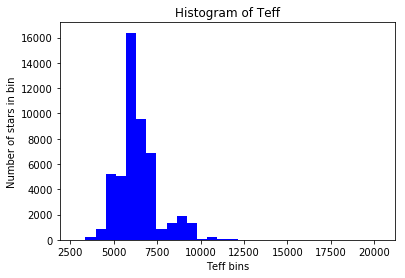

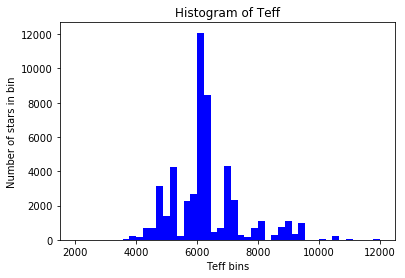

Results of number of stars in low Teff bins for TGAS x Wright et al Catalog
   Number of stars between 2000 and 2500:  0
   Number of stars between 2501 and 3000:  11
   Number of stars between 3001 and 3500:  5
   Number of stars between 3500 and 4000:  275
   Number of stars between 4001 and 4500:  831


In [634]:
plt.title("Histogram of Teff")
plt.xlabel('Teff bins')
plt.ylabel('Number of stars in bin')
plt.hist(Teff,bins=30,color='b')
plt.show()

plt.title("Histogram of Teff")
plt.xlabel('Teff bins')
plt.ylabel('Number of stars in bin')
plt.hist(Teff,bins=45,range=(2000,12000),color='b')
plt.show()

print("Results of number of stars in low Teff bins for TGAS x Wright et al Catalog")
TeffMask = ma.masked_outside(Teff,2000,2500)
print("   Number of stars between 2000 and 2500: ", TeffMask.count())
TeffMask = ma.masked_outside(Teff,2501,3000)
print("   Number of stars between 2501 and 3000: ", TeffMask.count())
TeffMask = ma.masked_outside(Teff,3001,3500)
print("   Number of stars between 3001 and 3500: ", TeffMask.count())
TeffMask = ma.masked_outside(Teff,3501,4000)
print("   Number of stars between 3500 and 4000: ", TeffMask.count())
TeffMask = ma.masked_outside(Teff,4001,4500)
print("   Number of stars between 4001 and 4500: ", TeffMask.count())

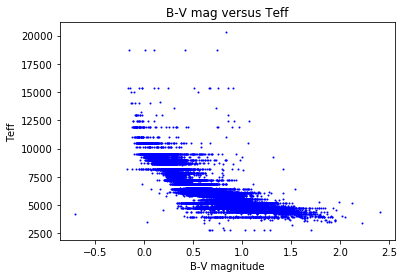

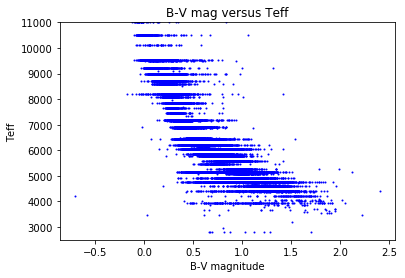

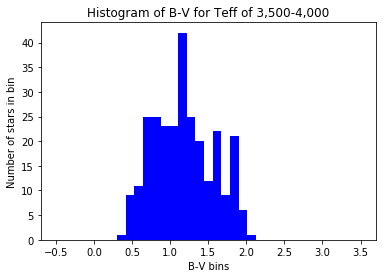

Number of stars in Teff=3,500-4,000: 275
     Median value:  1.17674
     Variance:      0.391215


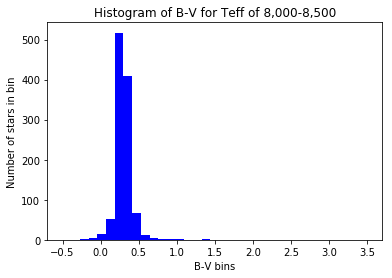

Number of stars in Teff=8,000-8,500: 1088
     Median value:  0.296658
     Variance:      0.107064
[3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000]
Number of stars in Teff= 3500 - 3999 : 250
     Median value:  1.14502
     Variance:      0.379122
Number of stars in Teff= 4000 - 4499 : 856
     Median value:  1.29979
     Variance:      0.271373
Number of stars in Teff= 4500 - 4999 : 5092
     Median value:  1.09839
     Variance:      0.207042
Number of stars in Teff= 5000 - 5499 : 4604
     Median value:  0.811438
     Variance:      0.18114
Number of stars in Teff= 5500 - 5999 : 4940
     Median value:  0.749893
     Variance:      0.106361
Number of stars in Teff= 6000 - 6499 : 20960
     Median value:  0.583833
     Variance:      0.102872
Number of stars in Teff= 6500 - 6999 : 4973
     Median value:  0.458334
     Variance:      0.0655275
Number of stars in Teff= 7000 - 7499 : 2611
     Median value:  0.386067
   

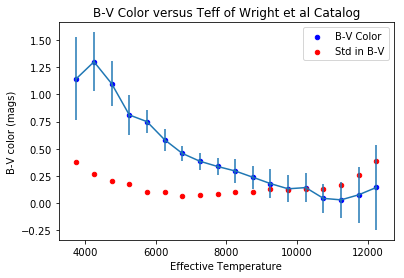

In [670]:
BmV = Bmags - Vmags
plt.title("B-V mag versus Teff")
plt.xlabel('B-V magnitude')
plt.ylabel('Teff')
plt.scatter(BmV,Teff,color='b',s=1.0)
plt.show()

plt.title("B-V mag versus Teff")
plt.xlabel('B-V magnitude')
plt.ylabel('Teff')
plt.ylim(2500,11000)
plt.scatter(BmV,Teff,color='b',s=1.0)
plt.show()

TeffMask = ma.masked_outside(Teff,3500,4000)
BmVMask = ma.array(BmV,mask=TeffMask.mask)
BmVplt = BmVMask.compressed()
plt.title("Histogram of B-V for Teff of 3,500-4,000")
plt.xlabel('B-V bins')
plt.ylabel('Number of stars in bin')
plt.hist(BmVplt,bins=35,range=(-0.5,3.5),color='b')
plt.show()
print("Number of stars in Teff=3,500-4,000:", TeffMask.count())
print("     Median value: ", np.mean(BmVplt))
print("     Variance:     ",np.std(BmVplt))

TeffMask = ma.masked_outside(Teff,8000,8500)
BmVMask = ma.array(BmV,mask=TeffMask.mask)
BmVplt = BmVMask.compressed()
plt.title("Histogram of B-V for Teff of 8,000-8,500")
plt.xlabel('B-V bins')
plt.ylabel('Number of stars in bin')
plt.hist(BmVplt,bins=35,range=(-0.5,3.5),color='b')
plt.show()
print("Number of stars in Teff=8,000-8,500:", TeffMask.count())
print("     Median value: ", np.mean(BmVplt))
print("     Variance:     ",np.std(BmVplt))

temps = [3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000]
print(temps)
Tave = []
BmVave = []
BmVstd = []
for tlow in temps:
    thi = tlow + 499.
    tmean = (thi+tlow)/2.0
    TeffMask = ma.masked_outside(Teff,tlow,thi)
    BmVMask = ma.array(BmV,mask=TeffMask.mask)
    BmVplt = BmVMask.compressed()
    Tave.append(tmean)
    BmVave.append(np.mean(BmVplt))
    BmVstd.append(np.std(BmVplt))
    print("Number of stars in Teff= %g - %g :"%(tlow,thi), TeffMask.count())
    print("     Median value: ", np.mean(BmVplt))
    print("     Variance:     ",np.std(BmVplt))
print(Tave)
print(BmVave)

plt.title("B-V Color versus Teff of Wright et al Catalog")
plt.xlabel('Effective Temperature')
plt.ylabel('B-V color (mags)')
pllab1 = plt.scatter(Tave,BmVave,s=20,c='b', label='plt1')
pllab2 = plt.scatter(Tave,BmVstd,s=20,c='r', label='plt2')
plt.legend([pllab1,pllab2],['B-V Color','Std in B-V'])
plt.errorbar(Tave,BmVave,yerr=BmVstd)
plt.show()


In [677]:
BmG = Bmags - Gmags
VmG = Vmags - Gmags
JmG = Jmags - Gmags
HmG = Hmags - Gmags
KmG = Kmags - Gmags
#for i in range(0,len(BmG)):
#    if(SpTypeN[i] < 4.9 or SpTypeN[i] > 5.05):
#        BmG.mask[i] = True
#        VmG.mask[i] = True
#        JmG.mask[i] = True
#        HmG.mask[i] = True
#        KmG.mask[i] = True

Tsed = np.zeros((len(temps),5))
Tsed_std = np.zeros((len(temps),5))
Tsed_cnt = np.zeros((len(temps),5))
Temp_SED = np.zeros(len(temps))
for i in range(0,len(temps)):
    tlo = temps[i]-0.1
    thi = tlo + 500.
    Temp_SED[i] = (thi+tlo)/2.0
    TeffMask = ma.masked_outside(Teff,tlo,thi)
    BmGMask = ma.array(BmG,mask=TeffMask.mask)
    Tsed[i,0] = np.mean(BmGMask)
    Tsed_std[i,0] = np.std(BmGMask)
    Tsed_cnt[i,0] = TeffMask.count()
    print(" B-G: Teff range: %g to %g"%(tlo,thi)," Mean: ",np.mean(BmGMask),"variance: ",np.std(BmGMask))
    VmGMask = ma.array(VmG,mask=TeffMask.mask)
    Tsed[i,1] = np.mean(VmGMask)
    Tsed_std[i,1] = np.std(VmGMask)
    Tsed_cnt[i,1] = TeffMask.count()
    print(" V-G: Teff range: %g to %g"%(tlo,thi)," Mean: ",np.mean(VmGMask),"variance: ",np.std(VmGMask))
    JmGMask = ma.array(JmG,mask=TeffMask.mask)
    Tsed[i,2] = np.mean(JmGMask)
    Tsed_std[i,2] = np.std(JmGMask)
    Tsed_cnt[i,2] = TeffMask.count()
    print(" J-G: Teff range: %g to %g"%(tlo,thi)," Mean: ",np.mean(JmGMask),"variance: ",np.std(JmGMask))
    HmGMask = ma.array(HmG,mask=TeffMask.mask)
    Tsed[i,3] = np.mean(HmGMask)
    Tsed_std[i,3] = np.std(HmGMask)
    Tsed_cnt[i,3] = TeffMask.count()
    print(" H-G: Teff range: %g to %g"%(tlo,thi)," Mean: ",np.mean(HmGMask),"variance: ",np.std(HmGMask))
    KmGMask = ma.array(KmG,mask=TeffMask.mask)
    Tsed[i,4] = np.mean(KmGMask)
    Tsed_std[i,4] = np.std(KmGMask)
    Tsed_cnt[i,4] = TeffMask.count()
    print(" K-G: Teff range: %g to %g"%(tlo,thi)," Mean: ",np.mean(KmGMask),"variance: ",np.std(KmGMask))

 B-G: Teff range: 3499.9 to 3999.9  Mean:  1.48911161201 variance:  0.446653979765
 V-G: Teff range: 3499.9 to 3999.9  Mean:  0.446874396746 variance:  0.193226063903
 J-G: Teff range: 3499.9 to 3999.9  Mean:  -1.30585128429 variance:  0.277761054809
 H-G: Teff range: 3499.9 to 3999.9  Mean:  -1.73139517648 variance:  0.378398753184
 K-G: Teff range: 3499.9 to 3999.9  Mean:  -1.84994363561 variance:  0.409550823941
 B-G: Teff range: 3999.9 to 4499.9  Mean:  1.73763980506 variance:  0.390427367514
 V-G: Teff range: 3999.9 to 4499.9  Mean:  0.520523202153 variance:  0.154830077807
 J-G: Teff range: 3999.9 to 4499.9  Mean:  -1.44854558353 variance:  0.237012732625
 H-G: Teff range: 3999.9 to 4499.9  Mean:  -1.9116044685 variance:  0.326094954116
 K-G: Teff range: 3999.9 to 4499.9  Mean:  -2.06688300713 variance:  0.360046066803
 B-G: Teff range: 4499.9 to 4999.9  Mean:  1.47589954304 variance:  0.293565770172
 V-G: Teff range: 4499.9 to 4999.9  Mean:  0.41729710225 variance:  0.1042575022

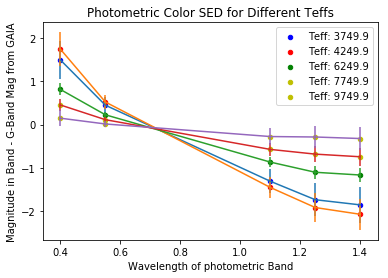

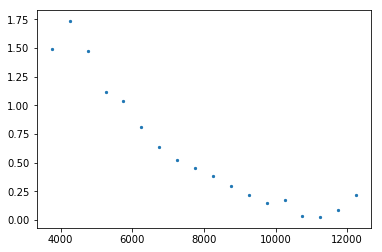

In [678]:
SEDplt = Tsed[0, : ]
SEDstd = Tsed_std[0, : ]
SEDtmp = Temp_SED[0]
SEDwave = np.array([.4,.55,1.1,1.25,1.4])
plt.title("Photometric Color SED for Different Teffs")
plt.xlabel('Wavelength of photometric Band')
plt.ylabel('Magnitude in Band - G-Band Mag from GAIA')
pllab1 = plt.scatter(SEDwave,SEDplt,s=20,c='b', label='plt1')
plt.errorbar(SEDwave,SEDplt,yerr=SEDstd)

SEDplt = Tsed[1, : ]
SEDstd = Tsed_std[1, : ]
SEDtmp = Temp_SED[1]
pllab2 = plt.scatter(SEDwave,SEDplt,s=20,c='r', label='plt2')
plt.errorbar(SEDwave,SEDplt,yerr=SEDstd)

SEDplt = Tsed[5, : ]
SEDstd = Tsed_std[5, : ]
SEDtmp = Temp_SED[5]
pllab3 = plt.scatter(SEDwave,SEDplt,s=20,c='g', label='plt3')
plt.errorbar(SEDwave,SEDplt,yerr=SEDstd)

SEDplt = Tsed[8, : ]
SEDstd = Tsed_std[8, : ]
SEDtmp = Temp_SED[8]
pllab4 = plt.scatter(SEDwave,SEDplt,s=20,c='y', label='plt4')
plt.errorbar(SEDwave,SEDplt,yerr=SEDstd)

SEDplt = Tsed[12, : ]
SEDstd = Tsed_std[12, : ]
SEDtmp = Temp_SED[12]
pllab5 = plt.scatter(SEDwave,SEDplt,s=20,c='y', label='plt5')
plt.errorbar(SEDwave,SEDplt,yerr=SEDstd)

plt.legend([pllab1,pllab2,pllab3,pllab4,pllab5],['Teff: %g'%(Temp_SED[0]),'Teff: %g'%(Temp_SED[1]),'Teff: %g'%(Temp_SED[5]),'Teff: %g'%(Temp_SED[8]),'Teff: %g'%(Temp_SED[12])])
plt.show()

Test = Tsed[ : ,0]
plt.scatter(Temp_SED,Test,s=5.0)
plt.show()

In [679]:
chi2 = np.zeros(len(Temp_SED))
i =2136
Test_SED = ma.masked_array([0.0]*5,mask=False)
print(type(Test_SED))
print(type(Test_SED[1]))
Test_SED[0] = Bmags[i]-Gmags[i]
Test_SED[1] = Vmags[i]-Gmags[i]
Test_SED[2] = Jmags[i]-Gmags[i]
Test_SED[3] = Hmags[i]-Gmags[i]
Test_SED[4] = Kmags[i]-Gmags[i]
print(Test_SED)
print(Test_SED.mask)
for j in range(0,len(Temp_SED)):
    Template = Tsed[j, : ]
    for k in range(0,5):
        if(Test_SED.mask[k] == False):
            chi2[j] = chi2[j] + (Test_SED[k]-Template[k])*(Test_SED[k]-Template[k])/(0.1*0.1)/5
    print(Temp_SED[j],chi2[j])
print(Teff[i],SpType[i],d1[i],d2[i],Wdist[i])

<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.float64'>
[1.2049999237060547 0.3129997253417969 -1.0620002746582031
 -1.329000473022461 -1.446000099182129]
[False False False False False]
3749.9 9.6639414393
4249.9 24.0222302674
4749.9 8.65446980622
5249.9 0.232358578393
5749.9 0.648650041514
6249.9 6.73621747455
6749.9 17.285300528
7249.9 27.5367594921
7749.9 35.2865314601
8249.9 46.0093916939
8749.9 58.4462564524
9249.9 71.9522339635
9749.9 83.5957819512
10249.9 76.8393473809
10749.9 105.027210958
11249.9 105.13603867
11749.9 94.6101852037
12249.9 75.6477382426
5570 b'G8 V' 0.293812 0.048208 1.311


2 0.0769701604516 11749.9 9520
9 0.0677503723109 6249.9 6440
14 0.639011599746 6749.9 6890
20 1.68168391938 5249.9 5250
23 0.376960782064 5749.9 6440
26 0.318614427919 6249.9 6440
28 0.242743459494 6249.9 5860
29 0.642628521215 6749.9 6440
30 0.0916253340387 7249.9 6890
31 0.164348615862 10749.9 9230
33 0.529761711956 6749.9 6440
37 0.0640449125117 9749.9 8970
39 0.5871228528 6749.9 6440
41 0.822462760216 10749.9 9520
43 0.45120243523 5749.9 5770
44 0.87064032335 6249.9 5860
49 0.196486471708 5749.9 5770
50 0.0130641351134 10749.9 9230
51 0.240142668824 6749.9 6890
54 0.0235063035648 7249.9 6890
55 0.142865528883 6749.9 6890
57 0.527698728338 5749.9 5770
58 0.968000998256 5749.9 5860
61 0.196116115469 6749.9 6890
63 0.544705353778 5749.9 5860
68 0.0988139501029 6749.9 6890
70 0.606286234678 6749.9 6440
71 0.360318315541 6249.9 6440
73 0.138083114475 6249.9 6440
75 0.495401719361 6249.9 6440
79 0.0108005234984 8749.9 7850
80 35.0470244811 11249.9 10500
82 0.183428878905 5749.9 5770
83 0

1117 0.617320789104 6249.9 5860
1118 0.0296366814461 6249.9 6440
1120 0.125438527146 6249.9 6200
1121 0.0945776531388 6749.9 6890
1123 0.227529050268 6249.9 6440
1125 0.0152116523477 5249.9 5770
1126 0.172914825652 6749.9 6440
1128 0.0867459005269 7249.9 7200
1132 0.649490574623 6249.9 7200
1136 0.0714128558155 6749.9 6890
1137 1.1465213743 6249.9 6890
1138 0.109202773282 5749.9 6030
1140 0.544537415689 6249.9 6440
1142 0.233172548537 6749.9 6890
1143 0.102401276698 6749.9 6890
1148 0.117359273163 7249.9 7850
1150 0.379451607799 6249.9 6890
1153 0.205334456053 6249.9 6440
1154 0.0444741881992 6749.9 7850
1155 0.360297337361 6249.9 6440
1165 0.199646246993 7249.9 6890
1170 0.126915065897 3749.9 5250
1174 0.689399270937 5749.9 6030
1176 4.84239602567 3749.9 5250
1177 0.602737283737 6249.9 6440
1179 0.0208027989699 7249.9 7850
1183 0.330447139182 6749.9 6890
1185 1.53307230076 5249.9 5860
1188 0.0319478860093 7249.9 6890
1191 0.419891828029 6249.9 6030
1192 4.08634393713 4249.9 4590
1199 

2230 0.680920612042 6249.9 6440
2231 0.0208318156923 6749.9 6890
2233 1.50367463373 4749.9 5250
2234 0.420950941127 6249.9 6440
2235 0.596357991059 6249.9 5860
2241 0.476678497186 6749.9 6440
2244 0.177083433556 6249.9 6440
2245 2.6032793854 10749.9 9520
2246 0.106671609313 6249.9 6030
2247 0.0698371205182 7249.9 6890
2250 0.0665696237754 8249.9 8720
2251 0.889824709924 5749.9 6030
2252 0.0901903270998 6249.9 6440
2253 0.918003839858 6249.9 6440
2257 0.0974863786678 7249.9 7200
2259 0.378629760777 3749.9 4900
2261 0.109118526935 6249.9 6030
2263 0.195910333643 8749.9 8970
2264 0.387113144159 7749.9 7850
2266 0.154882952959 5249.9 5770
2267 0.0652538510306 11749.9 9520
2269 0.185618524796 6249.9 6440
2270 0.0948747916537 11749.9 9230
2273 0.0774975896195 6249.9 6030
2277 0.615265531065 6749.9 6440
2278 0.526903240016 6249.9 6440
2279 0.447144034889 6249.9 5860
2283 0.148918637897 9249.9 9520
2286 0.168370359242 5749.9 5860
2295 0.601798959464 6249.9 6200
2296 0.138546998108 10749.9 8970

3211 0.0217722391294 6249.9 6200
3216 0.139807001284 10749.9 9520
3218 0.868361220293 4749.9 5250
3219 4.25856448633 4249.9 4730
3221 0.425570620607 5749.9 5860
3223 0.0660768917781 6249.9 6440
3224 0.972717183999 6249.9 5860
3229 0.341762096788 5749.9 5770
3230 0.328255665664 6249.9 6890
3233 0.900702758467 6249.9 5860
3234 0.0379869516356 7749.9 6890
3235 0.081914822142 6249.9 6440
3240 0.163386838049 6249.9 6200
3242 0.0266828491869 10249.9 8200
3243 0.316304665568 5749.9 5770
3244 0.025652766085 7749.9 7850
3245 0.302910455478 6249.9 6030
3246 0.858671330166 6249.9 6030
3247 0.157476240817 5249.9 5770
3249 0.910009668301 5749.9 6030
3252 0.386405153699 8749.9 9520
3254 0.279569728909 5749.9 5860
3256 0.414030577282 5749.9 5860
3257 0.0356272147057 6749.9 6890
3259 0.215476056689 7249.9 7200
3261 0.139769767629 6249.9 6030
3263 0.397662129628 6749.9 6890
3267 0.516319773421 5749.9 5860
3268 0.139937172904 10749.9 11900
3270 0.420584385432 5749.9 5860
3273 0.274811254521 6749.9 6890


4118 0.120260923255 7249.9 6890
4121 0.124430381249 6249.9 5860
4122 0.655915910513 10749.9 9230
4123 0.14073902877 6749.9 6890
4124 0.112110993262 7249.9 7200
4128 0.0223251531662 7249.9 7200
4132 2.42249010924 6249.9 10500
4133 0.339270721284 5749.9 5860
4140 0.618774397865 6249.9 5860
4142 0.153764014429 6249.9 5770
4148 0.239226535807 6749.9 6440
4149 0.640665515826 5749.9 5860
4150 0.258040903565 6249.9 6200
4153 1.03481388475 5749.9 5860
4154 0.162553183932 7749.9 7200
4156 0.325016842452 6249.9 6440
4158 0.263184792254 10749.9 9520
4162 0.87422914871 5749.9 5860
4164 0.181836598473 6249.9 6440
4165 0.847309488573 6249.9 5770
4166 0.045332572708 6249.9 6440
4167 0.896488741095 5749.9 6200
4168 0.470430949249 6249.9 6440
4169 0.0554924921459 10749.9 9520
4171 0.976020832985 5749.9 5570
4173 0.0654021133055 11249.9 10500
4174 0.010814635965 10749.9 9520
4175 0.193238285955 8749.9 15400
4176 0.552859899004 6249.9 6030
4179 0.0273439496649 5249.9 5770
4182 0.039077131119 5749.9 5860


5178 0.239663003258 6249.9 6440
5182 0.072073271283 11749.9 8720
5184 0.112323633544 9249.9 8970
5185 0.0188978444034 6749.9 6890
5187 0.0233478677003 6749.9 6890
5188 0.0399095890754 6249.9 6440
5190 0.21372726137 7249.9 7200
5191 0.151332920082 6249.9 6440
5192 0.613329189232 6749.9 6890
5193 0.661492532308 6249.9 6440
5194 0.56432020147 6749.9 6440
5197 0.702276144747 6249.9 6030
5199 0.135661185485 6249.9 6440
5200 0.0242982311717 7749.9 7850
5201 0.160719992376 5749.9 5860
5204 0.114940365827 6249.9 6030
5207 0.518384217008 6249.9 6440
5212 0.0648128858184 6749.9 6440
5214 0.101287869005 6749.9 6440
5220 0.185427659544 10749.9 9520
5223 0.582943383563 6749.9 6440
5225 1.05469915329 10749.9 9520
5227 0.0341780177099 5749.9 5860
5229 0.466739743523 6249.9 6890
5234 0.035759563811 6249.9 6440
5235 0.183288006421 9249.9 8200
5237 0.738851924538 5749.9 6030
5249 0.154028922448 5249.9 5570
5251 0.425499545073 6249.9 6440
5255 0.055965246153 5749.9 5770
5257 0.187550400084 7249.9 6890
52

5889 0.270698989482 5249.9 5570
5890 0.751470739888 5749.9 6030
5891 0.339843358102 6249.9 6440
5893 0.0387955226531 8749.9 8200
5901 0.482515422309 6249.9 6030
5904 0.359995835341 5749.9 5770
5909 0.0429871938863 6249.9 6440
5911 0.571242230964 6749.9 6440
5913 0.138849146904 5749.9 5860
5914 0.140636743093 7749.9 7850
5919 4.15366578553 5249.9 6440
5923 0.0858513728042 6749.9 6890
5924 0.153904082548 7249.9 6890
5926 0.268644463598 7249.9 6890
5927 0.0655709593461 6749.9 6440
5936 0.4604176261 5749.9 5860
5937 0.578355021936 6249.9 6030
5938 1.66178895693 5249.9 5770
5948 0.164526450092 11749.9 9230
5952 0.740023430994 5749.9 5860
5954 0.360785962456 6749.9 6440
5957 0.267726295914 5749.9 5770
5958 0.366468849912 6749.9 6890
5959 0.0302978874579 6249.9 6440
5961 0.168749886781 4749.9 5250
5974 4.74189110508 4249.9 4900
5976 0.195189193932 6749.9 6890
5979 1.80407860234 10749.9 9520
5981 1.58180788241 8749.9 8970
5982 0.190354829714 4249.9 4730
5984 0.304685861213 6249.9 6440
5988 3.4

6999 0.792552869966 6249.9 6200
7000 2.02724013051 5249.9 5570
7003 0.233450803245 6749.9 6440
7005 0.484520781289 6749.9 6440
7007 0.126532298752 6249.9 6030
7009 0.221648917967 6249.9 6200
7011 3.5417120352 4249.9 4730
7012 0.18445489036 6749.9 6890
7013 0.329035645157 6749.9 7200
7015 0.422262120655 6249.9 6440
7018 0.0261625234532 6749.9 6440
7019 0.107658974045 7749.9 7200
7020 0.105622427356 5249.9 5770
7021 0.193630692026 6749.9 6890
7023 0.961813041866 5249.9 5570
7024 0.813961317879 6249.9 9520
7027 0.856565996813 4249.9 5080
7028 0.95953839709 6249.9 5860
7030 2.99512728821 5749.9 6440
7031 0.715463899812 4249.9 4600
7032 0.210403064047 6249.9 6030
7035 0.626725990441 3749.9 5250
7036 0.542770872922 6249.9 6030
7038 0.104867185045 3749.9 5080
7043 2.00379744069 5249.9 5770
7045 0.744225765524 5749.9 5860
7046 0.0472664759009 6249.9 6440
7050 0.232884595659 6749.9 6890
7051 0.236538851857 6249.9 6030
7054 0.0652664655366 6249.9 6200
7056 0.690186459267 5749.9 6030
7058 0.06846

7992 0.821654511255 5749.9 5860
7993 0.51878628161 6249.9 6200
7994 0.0724970217073 6249.9 6440
7995 0.12108029102 6749.9 6890
7998 0.43067843499 5749.9 5860
8000 0.338707236927 6749.9 6440
8002 0.268055376898 6249.9 6030
8005 57.2911347318 5249.9 6030
8007 0.0610094740496 6249.9 6030
8008 0.11883098355 6749.9 6890
8010 0.0625127489188 7749.9 7200
8011 0.0822032276744 6249.9 6440
8013 0.644673059337 6249.9 6200
8014 0.0858762194243 5249.9 5770
8016 1.29234828802 6249.9 5860
8019 0.210454112488 6749.9 6200
8022 0.0224885988604 6749.9 6890
8024 0.589876204239 6249.9 6440
8029 0.583185894168 6249.9 5860
8030 0.224270065407 6749.9 6440
8031 0.0582558583538 5749.9 6030
8032 1.2693401134 6249.9 6030
8033 0.711508675283 6749.9 6440
8036 0.296055154563 6249.9 6440
8037 0.536192739641 5749.9 5770
8039 0.323802758354 6749.9 6890
8041 0.377825470841 4749.9 5080
8043 0.157231016302 6249.9 6030
8044 0.0996036614542 6749.9 6440
8047 0.0435333919598 5749.9 5770
8048 0.0257849796777 6749.9 6440
8050 0

8835 0.109803293228 6249.9 6200
8838 0.560448802966 6249.9 6440
8840 0.176957154281 6249.9 6440
8842 0.42767054763 6749.9 6440
8844 0.963111045437 7749.9 8970
8850 0.509094198752 6249.9 6890
8851 0.155544879774 5249.9 5770
8853 0.0781545991901 5249.9 5770
8856 1.15548157956 4249.9 4900
8860 0.174329152185 7749.9 7850
8862 0.014638475192 6749.9 6440
8864 0.340810718075 5749.9 5860
8865 0.0420713134631 7249.9 7850
8867 0.478979868583 6249.9 6440
8868 0.15180156718 7749.9 7850
8870 0.0873096196715 7249.9 6890
8874 0.689762990171 5749.9 5860
8881 0.00984735854362 10749.9 8970
8882 0.13079347429 7749.9 7850
8883 0.706834169928 5749.9 6030
8884 0.0954806792637 7249.9 7850
8887 0.189484545542 6249.9 6440
8889 0.917077388743 5749.9 5860
8890 0.758914427364 6249.9 6440
8895 0.68096877773 5749.9 6030
8898 0.252101719911 7249.9 6890
8899 0.259145053691 5249.9 5770
8901 0.612640196368 6249.9 6200
8903 0.262059499673 6749.9 6890
8905 0.172952570667 6249.9 6440
8907 0.054802456346 6749.9 6890
8908 0

9656 0.247707127544 5749.9 6030
9657 0.52349615533 5749.9 5860
9664 0.429809898512 6749.9 7200
9665 0.121431824037 5249.9 5770
9666 0.187520769386 7749.9 7200
9667 0.362314278053 5749.9 6030
9668 0.0390936561564 7249.9 6890
9670 0.565462357011 6249.9 7200
9671 0.115736629289 6749.9 7200
9674 0.0525006954128 5749.9 6030
9675 0.5124397471 6249.9 7200
9676 0.187648083765 6749.9 6890
9678 0.0853006264769 6249.9 6440
9681 0.104943636271 6249.9 6440
9682 0.724871379626 5249.9 5570
9685 0.0940006343296 5749.9 5860
9687 0.339729660677 6249.9 7200
9689 0.058910949985 6749.9 6890
9690 0.170251224742 6749.9 6890
9692 0.895048837523 5249.9 6440
9694 0.372706380611 6249.9 6200
9696 0.719453414026 5749.9 5860
9699 0.0157052446248 6749.9 6890
9701 0.599501149099 6249.9 6890
9703 1.02764193177 5249.9 5860
9704 0.251252874251 5749.9 6440
9705 0.942184259215 6249.9 6440
9706 0.247954424056 6249.9 6440
9708 0.274853876275 3749.9 4900
9709 0.195114953139 10749.9 10500
9710 0.785490743778 4749.9 4900
9712 

10447 0.307940051934 6249.9 6440
10451 0.344894822332 6249.9 6030
10455 0.388304173209 6749.9 6200
10456 0.0316595311086 7749.9 7200
10458 0.284691150418 6749.9 6890
10459 0.155812349355 6249.9 6440
10465 0.085392788498 12249.9 8200
10467 0.134138224857 6749.9 6890
10469 0.650701356553 5749.9 5860
10472 0.186530044766 6249.9 6440
10478 0.19168008345 6249.9 6200
10480 0.027796858345 7749.9 7200
10483 0.925559438535 6249.9 6200
10487 0.786278822272 10749.9 9520
10489 0.0333980487168 10749.9 9520
10492 1.6854030953 4749.9 5770
10496 0.224516188125 6249.9 6440
10498 0.947801314528 5749.9 6030
10499 0.321877944396 6749.9 6440
10501 0.354370710222 5749.9 5860
10502 0.449092358171 6249.9 6030
10503 0.624319106639 6249.9 6440
10512 0.589044799001 5749.9 5860
10513 0.187318712881 4249.9 4730
10517 0.20937887616 6749.9 6440
10518 0.297075249867 6249.9 5860
10521 0.136782512665 6249.9 6030
10522 0.651761995991 6749.9 6440
10524 1.08526254619 6249.9 6030
10527 0.182171826469 6249.9 6200
10530 0.02

11059 0.0109596424045 7249.9 7850
11060 0.20529956371 5749.9 5770
11062 0.576342247779 6249.9 6440
11063 0.362644045026 6249.9 6440
11064 1.3919065398 10249.9 10500
11065 0.08518499958 6749.9 6890
11066 0.0922099267547 7249.9 7200
11067 0.0745824125152 5249.9 5770
11070 0.0938862704441 7249.9 7200
11074 0.480542921643 6249.9 8720
11077 0.121406270675 5749.9 5770
11079 0.286379846032 6749.9 6890
11080 0.0443839420986 6249.9 6440
11081 0.542065373177 6249.9 6890
11085 0.0161558608016 5249.9 5570
11087 0.202158448941 6249.9 6440
11089 0.133327649368 6749.9 6440
11093 0.163616134673 5749.9 5770
11094 0.180705459851 7749.9 7200
11101 0.105989101611 6749.9 6440
11105 0.113654900904 8749.9 7850
11108 0.0454834159616 5749.9 5770
11110 0.136032960065 6749.9 6440
11114 0.0807243638221 6249.9 6890
11115 0.45762700055 5249.9 5860
11118 0.0897663883275 6749.9 6440
11120 0.141840276329 4749.9 5080
11128 0.208426496016 6749.9 6890
11133 0.188269062637 8249.9 7850
11134 0.179951585026 6249.9 6440
1113

12233 0.197102595178 6249.9 6200
12235 0.823589102243 6249.9 6440
12236 0.0777012454798 11749.9 8720
12239 1.13608551963 5749.9 6030
12241 7.30297620968 10749.9 11900
12246 0.257184787248 6749.9 7200
12248 0.0600627827039 6749.9 7200
12251 0.0300523386277 8249.9 7200
12253 1.60070555047 3749.9 6030
12254 0.0611872623947 6249.9 6200
12257 0.228144036747 6249.9 6440
12259 0.108802177365 7749.9 7200
12260 0.179940466357 5249.9 5770
12264 0.0736473221087 5749.9 5770
12265 0.108282143531 6249.9 6440
12269 0.101407399365 6249.9 6030
12274 0.0286861013776 5749.9 5860
12275 0.334495424069 6249.9 6440
12276 0.962485637199 5749.9 6890
12278 0.308724540933 5749.9 5860
12279 0.466886583706 5749.9 5860
12283 0.452297717115 6249.9 6440
12285 0.0943103739067 6749.9 7200
12287 0.590932228789 5249.9 6440
12290 0.840115249834 6249.9 6440
12291 0.296726162338 6749.9 6890
12292 1.92290626332 5249.9 5570
12294 0.625139105071 6749.9 6440
12297 0.976032785764 4749.9 5570
12299 0.250107162558 6249.9 6200
1230

13225 0.141514060054 6749.9 6440
13226 0.41797626588 6249.9 5860
13229 0.136683495379 6249.9 6200
13231 0.0816751899795 6749.9 6890
13232 0.681903642101 5249.9 5770
13233 0.214593030357 5249.9 5770
13236 0.250429055931 6249.9 6440
13237 0.267089761587 6749.9 6890
13245 0.251856554112 6249.9 6440
13248 0.529367810477 5249.9 5570
13249 0.111797818598 9749.9 8970
13252 0.397134159824 6249.9 6440
13253 0.0878004545094 8249.9 7850
13256 0.620867185429 6249.9 6440
13263 0.0695526532842 6249.9 6200
13267 4.21879215189 4249.9 4350
13268 0.21369668035 6249.9 6440
13271 2.10885446651 4749.9 5250
13272 0.210466227356 7249.9 7200
13278 0.187063146892 7249.9 6890
13279 0.601671349784 6249.9 6440
13280 0.203679126366 6249.9 6200
13285 0.0445003743236 6749.9 6890
13286 0.660915437412 5749.9 5860
13289 0.105056916359 6249.9 6440
13291 0.184051809387 3749.9 5570
13294 0.663278860159 6749.9 6890
13298 0.439738716757 6249.9 6030
13300 0.00941742834792 7749.9 7200
13301 0.168177628049 6249.9 6890
13303 0.

14193 0.0758598752044 7749.9 6440
14196 0.340728688792 6249.9 5860
14197 0.244483571213 5749.9 5860
14199 0.142856431383 5249.9 5250
14202 0.277474698226 6249.9 6440
14206 1.14441737906 5749.9 6030
14207 4.26204753129 5749.9 6890
14209 0.454671128034 6749.9 6440
14211 0.337794762314 6249.9 6030
14212 0.0764425682665 6249.9 6440
14217 0.188948817176 6249.9 6030
14218 0.386033466858 6749.9 6440
14225 1.67102340627 11249.9 11900
14226 0.496677971991 6749.9 6440
14228 0.121600353218 5749.9 5860
14229 0.053231364231 6249.9 6030
14232 0.252928777941 5749.9 5770
14236 0.112205764989 6749.9 6890
14237 0.2276497934 6749.9 6890
14238 0.376301244153 5749.9 5860
14241 0.00622062446907 5249.9 5570
14242 0.465194583801 6749.9 6440
14243 0.540292931162 6749.9 6440
14246 0.539583993975 6249.9 6890
14247 0.340345801276 6249.9 6440
14254 0.40015237293 6249.9 6890
14256 1.32088818049 5249.9 5570
14257 0.283686861146 6749.9 6890
14260 0.135944491635 6749.9 6440
14262 0.0987402061958 10249.9 8720
14263 0.1

15289 0.497398536308 6749.9 7200
15294 0.090614679057 6249.9 6890
15297 0.213876905136 7249.9 6890
15298 1.48378300577 4749.9 5250
15301 0.579490846617 5749.9 5860
15304 0.0520681299899 6749.9 6440
15305 0.0291343537526 6749.9 6890
15308 0.12191285181 5749.9 5860
15311 0.169913538556 6249.9 6030
15312 0.628961720591 5749.9 5860
15314 0.635443990974 5749.9 5860
15317 0.0451274558442 8249.9 7200
15318 1.20477180671 6249.9 5860
15320 0.357763089642 3749.9 5250
15321 0.016142111916 9749.9 9230
15326 0.780822793556 4249.9 4730
15327 0.209461413531 6249.9 6440
15329 0.335555508052 10749.9 9520
15330 0.115600097168 8749.9 8100
15331 0.192932607176 5249.9 5860
15332 0.891752333778 5749.9 5860
15333 0.0474902017585 5749.9 5860
15338 0.532637780056 10749.9 3470
15340 0.454655759503 6249.9 6890
15341 0.585145048193 6249.9 6440
15344 0.274930019146 6249.9 6890
15346 0.441840731954 7249.9 6890
15349 0.674638259673 5749.9 6030
15350 0.526713012304 5749.9 5860
15353 0.48158983631 6249.9 6440
15356 0.

16295 0.0265182239067 10249.9 8720
16297 0.0820228891662 6749.9 6890
16298 0.90121820775 6249.9 6030
16302 0.135031656095 5749.9 6030
16304 0.0553026407936 6249.9 6440
16306 0.327111779696 6749.9 6440
16307 0.40718734731 5749.9 5770
16310 0.174305767837 5749.9 5860
16313 0.240187277788 8749.9 8720
16314 0.569478446161 4749.9 5770
16317 0.258315106256 6249.9 6440
16320 0.118818027488 5249.9 5860
16322 0.0333956844087 7249.9 6890
16326 0.150121777912 5749.9 5770
16330 0.0740350647907 7249.9 7850
16332 0.0644501123098 9749.9 9520
16337 0.306291780798 6749.9 6440
16338 0.283053567422 6249.9 6440
16339 0.312436528252 6249.9 6440
16342 0.112212747831 6249.9 6030
16343 0.0779932269191 6249.9 6030
16346 0.178228127933 4749.9 5080
16364 0.428204990386 6749.9 6440
16365 0.478626214016 6249.9 6440
16368 0.0937983509079 6749.9 6440
16379 0.698625930221 5749.9 5860
16385 0.641110421634 6249.9 6030
16386 0.221989271434 6249.9 6440
16387 0.0500597123051 9749.9 8720
16392 0.682349265947 6249.9 6030
16

17479 0.168657807404 7749.9 7850
17481 0.59269163124 6249.9 6440
17482 0.242943912143 6749.9 7200
17484 0.0438845012247 6749.9 6440
17485 0.114590662947 6749.9 6440
17486 0.0492057006908 11749.9 8720
17487 0.117403068823 6249.9 6030
17490 0.335150262199 5749.9 5860
17491 0.0257607492219 6249.9 6440
17492 0.168377002298 7749.9 7850
17501 0.114595942813 4249.9 4590
17503 0.214974198628 6249.9 6030
17505 0.0853383792826 5749.9 5860
17508 0.128994320737 6749.9 6440
17509 0.0354123934321 7749.9 7200
17510 0.0933080570696 8249.9 7200
17511 0.259886071432 7249.9 6890
17512 0.727812388344 5749.9 5860
17513 0.132891029371 7249.9 6870
17514 0.351051575977 6249.9 6890
17517 0.278845978568 6249.9 6440
17519 0.35362282391 5749.9 5860
17520 0.0620890536007 6749.9 6440
17525 0.990630831694 5749.9 6890
17527 0.313142178296 6249.9 6890
17528 0.219812196381 6249.9 5860
17534 0.1770418467 5749.9 5770
17536 0.146637362447 6749.9 6890
17538 0.113177964427 7249.9 7200
17542 0.132950326058 7749.9 7200
17543 

18638 0.0361138227531 6749.9 6890
18641 0.582977956199 6749.9 6890
18642 0.45428886601 6749.9 6440
18645 0.325052129988 6249.9 6200
18646 4.37178257775 5249.9 5860
18649 0.0361068864105 5749.9 5770
18654 0.0653105362912 6749.9 6440
18656 0.0493837853001 8249.9 7850
18657 0.156323124154 6249.9 6030
18662 1.24743714844 5249.9 5770
18665 0.936836379579 6249.9 5860
18666 0.0246623917365 8749.9 8200
18669 0.476900640529 6249.9 6440
18679 0.120200119873 6249.9 6030
18686 0.509034531363 6749.9 6440
18688 0.46960264309 6249.9 6440
18692 0.655355566123 6249.9 6440
18694 0.317636575918 7249.9 7200
18700 0.0761245900068 6749.9 6890
18705 0.037100389897 6749.9 6890
18708 0.480656294775 6249.9 6440
18710 0.439434633011 6249.9 6440
18711 0.82355529317 5749.9 6030
18716 0.105915550831 6749.9 6890
18717 0.283224029201 6249.9 6440
18725 0.404195877653 6249.9 6440
18726 0.197315831748 6249.9 6440
18727 0.225278820317 5749.9 5860
18731 0.1410809437 6249.9 6030
18733 0.132195868589 8249.9 8200
18737 0.109

19802 4.48366889717 4249.9 4350
19803 0.00937075436666 6249.9 6440
19806 0.339155480931 9249.9 9520
19807 0.0743967809428 6249.9 6200
19810 0.0957991172464 6749.9 6890
19811 0.149241299807 9249.9 9230
19816 0.25994631349 6249.9 6030
19819 0.104087813246 5249.9 5770
19823 0.542436864844 6249.9 6030
19824 0.962007779133 5749.9 5860
19826 0.0514196926916 6249.9 6200
19827 0.234598610928 6249.9 6200
19833 0.0111699062272 6249.9 6440
19835 0.189217235324 6749.9 6890
19837 0.551481436891 6749.9 6440
19838 0.238957864862 6249.9 5860
19839 0.284888716129 5749.9 5860
19842 1.09346258038 6249.9 5860
19845 0.0619935658626 6749.9 6440
19848 0.126499923671 6749.9 6890
19851 0.351652004401 6249.9 6440
19853 0.0758519444659 6249.9 6440
19857 0.108273301145 6249.9 6030
19858 0.112439266116 6249.9 6440
19859 0.119107293006 6749.9 6440
19865 0.477270129032 6249.9 5860
19867 0.324064741368 6749.9 6890
19869 0.0801959388559 7249.9 7850
19871 0.188377426004 6749.9 6440
19872 0.257677691937 6249.9 5860
1987

20852 0.105383354062 6749.9 6440
20856 0.294204129811 5749.9 6030
20858 0.0385366246789 11749.9 8720
20864 0.614235951467 6249.9 6030
20866 0.0368640284124 9749.9 9230
20870 0.309079501498 6249.9 6440
20871 0.341834196272 6249.9 6440
20877 0.0392276456485 7749.9 6890
20882 1.1917150994 10749.9 9520
20885 0.122554902044 6249.9 6440
20886 0.392190577641 6749.9 6890
20887 0.106649153597 6249.9 6440
20888 0.345873906466 6749.9 6440
20895 0.430362326895 10749.9 9230
20896 0.0253067612529 6749.9 6440
20897 4.11193784943 6249.9 6890
20899 0.0982490622139 7249.9 7200
20900 0.61324044557 5749.9 6030
20903 0.0170200350437 6249.9 6030
20906 1.66198830836 5749.9 6030
20912 0.0920449642951 6749.9 6440
20913 1.93780862275 10749.9 9520
20914 0.129816402933 7249.9 6890
20916 0.101778255978 6749.9 6890
20917 0.142053132454 7749.9 7850
20921 0.370441618355 6249.9 6440
20926 0.598295299024 6249.9 6440
20930 0.179438747373 5749.9 5860
20935 0.156781592138 10749.9 9230
20936 0.0978812226905 6749.9 6890
209

21863 0.100919021198 6749.9 7850
21870 0.253623403275 6249.9 5860
21874 0.0644273184531 6749.9 6890
21875 0.0669836726938 6249.9 6030
21877 0.539857780433 6249.9 6030
21881 0.677051323053 6749.9 6440
21890 0.072012039499 6749.9 6440
21895 0.0881836444114 6249.9 6200
21896 0.172706017247 6249.9 6030
21899 0.209412886067 6249.9 6440
21901 0.722033548404 5749.9 5860
21906 0.169687828938 8749.9 8720
21911 0.554254385604 6249.9 6200
21912 2.21367922877 5249.9 5770
21919 0.902142729259 5749.9 6030
21920 0.287394813109 5749.9 5860
21922 1.2893356445 6249.9 6890
21923 0.409621714463 5749.9 5860
21925 0.0993245584883 5749.9 5770
21926 0.424025261416 5249.9 5570
21929 0.0646676235334 5249.9 5770
21931 0.365064681723 6749.9 6440
21935 0.54643548557 5749.9 5860
21938 0.0652411357648 10249.9 10500
21939 0.0922626083026 6749.9 6890
21942 0.11732638755 8249.9 7850
21943 0.846461838193 5249.9 6440
21944 0.22133740038 6249.9 6030
21949 0.181204618382 5249.9 5770
21951 2.42577018282 5249.9 6440
21956 0.

22935 0.0889765811261 11749.9 8970
22942 0.484136896526 6749.9 6440
22946 0.120571065151 6749.9 6890
22951 0.874628354791 6249.9 5860
22957 0.249847380385 6249.9 6440
22959 0.462971287476 6249.9 6440
22963 0.462336904142 6249.9 6200
22964 1.11101712739 4249.9 5080
22965 0.161823070109 6749.9 6440
22968 2.335982473 5249.9 5770
22969 0.115335668877 7249.9 6890
22970 0.314300961258 6249.9 6890
22971 0.0350780555542 6749.9 6890
22975 0.0915562095029 6749.9 6890
22976 0.102427713865 7249.9 6890
22978 0.219774424954 6749.9 6890
22981 0.112749559747 5249.9 5770
22982 0.767619590131 6249.9 6890
22983 0.895963030168 6749.9 6890
22987 0.0543775171539 6249.9 5860
22990 0.708902893558 6749.9 6440
22993 0.53741376851 5749.9 6200
22994 0.292483160298 5249.9 5570
22996 0.310331294167 6249.9 6030
22997 0.644694175764 6249.9 6440
23000 0.389094976357 5749.9 6440
23005 0.134174188391 5749.9 6030
23007 0.0685775858554 5749.9 5770
23009 0.0643381871989 5249.9 5860
23013 0.0196779921871 7249.9 6890
23014 0

24198 0.949694687572 5749.9 5860
24205 0.884419974759 10749.9 9230
24210 0.34680716724 4249.9 4730
24213 0.241693095242 5749.9 5860
24219 0.162971009608 6249.9 6030
24221 0.965893615904 10749.9 9520
24224 0.165975452843 3749.9 5570
24225 0.168118851265 6749.9 6890
24226 0.125635360843 7249.9 6890
24227 0.345004709753 6749.9 6890
24232 0.0263309149323 6249.9 6440
24246 0.901994688687 6249.9 5860
24248 0.0322578495657 5249.9 5860
24259 0.0316740527343 5749.9 5860
24271 0.0991630676008 6249.9 6200
24272 0.562581003725 3749.9 5570
24273 0.118791828683 11749.9 8720
24274 0.36488315359 5749.9 6030
24276 0.415927923091 6249.9 5860
24277 0.0385833018909 7249.9 7200
24278 0.107115467437 5249.9 5570
24280 0.245987625174 6249.9 6030
24284 0.452715363186 6749.9 6440
24291 0.468362816521 6749.9 6440
24293 0.0670081042633 6749.9 6890
24294 0.134893222223 6749.9 6890
24296 0.465005668016 5749.9 5860
24298 0.0387946417534 7249.9 6890
24299 0.0705306768729 6749.9 6440
24300 0.1048885313 6249.9 6440
243

25400 0.0625607769194 6249.9 6440
25406 0.0895394760659 6749.9 6890
25409 0.0523343682051 5249.9 5570
25410 0.127221899407 6249.9 5860
25411 0.0929778049408 7249.9 7850
25413 0.479280175567 6249.9 6200
25416 0.0960028737055 6749.9 6440
25421 0.224206920505 6749.9 6440
25422 0.0410399124823 6249.9 6200
25424 0.0578637327469 5749.9 5860
25426 0.0978910873468 6249.9 6030
25428 0.266044789023 4249.9 4730
25429 0.940820566454 6249.9 5770
25431 0.271195163038 5749.9 5860
25434 0.76761423381 4249.9 4730
25435 5.11934601229 4249.9 5570
25437 0.588731332693 6749.9 6440
25439 0.07570438039 6249.9 6030
25441 0.1497906101 6249.9 6440
25442 1.13281061254 4749.9 5250
25445 0.100033732768 6749.9 6890
25447 0.00697023007657 6749.9 6890
25452 0.384042305912 6249.9 6030
25454 0.0688246432732 5249.9 5570
25456 0.0226253920639 5249.9 5770
25458 0.401184896553 6249.9 6440
25461 0.459165683074 6749.9 6890
25463 0.175233537615 6749.9 6890
25464 1.90098516131 5249.9 5570
25466 0.217071044782 6749.9 6890
25468

26289 0.272716060384 6249.9 6030
26296 0.387308972845 6249.9 6030
26299 0.417618713056 5749.9 5770
26301 0.328897424339 5249.9 5770
26303 0.369848236447 6749.9 6440
26305 0.0228741686858 6249.9 6030
26306 0.331653445798 6249.9 6440
26307 1.59742094268 6249.9 5860
26311 0.0452460405726 5249.9 5570
26313 10.9774345443 4249.9 4350
26315 0.168768107569 7249.9 6890
26317 0.143850826183 5749.9 5860
26318 0.149790028732 6249.9 6030
26319 0.0306639078244 6749.9 6890
26320 0.160292034859 6749.9 6440
26321 0.886556033899 6249.9 5860
26324 0.407914455424 6749.9 6890
26326 0.722097470466 6249.9 5860
26328 0.075842523767 6249.9 6200
26329 0.337663587836 6249.9 6440
26331 0.132322312489 7749.9 7200
26334 0.158100020398 5749.9 5860
26339 0.499106859971 5249.9 5570
26340 0.228788770191 5749.9 5860
26342 0.392373001119 6249.9 6030
26345 0.160876396642 6749.9 6890
26350 0.418162679933 5749.9 5860
26351 0.315287785221 6249.9 6030
26353 0.638393679066 6749.9 6890
26354 0.352875615883 6749.9 6440
26355 0.9

27150 0.0828020067736 6249.9 6440
27153 0.212820622652 7249.9 6890
27158 0.025984228578 8249.9 8720
27159 0.304222024335 6249.9 6440
27160 3.15699723776 10749.9 11900
27161 0.205549006962 6749.9 6890
27164 0.0864474469819 5249.9 5770
27165 0.440086284468 6249.9 6440
27168 0.511098509617 6749.9 6440
27169 0.23155981293 3749.9 4900
27171 0.404089602332 5749.9 6440
27172 0.144596207602 6249.9 6890
27173 1.78398677125 4749.9 5250
27174 0.181223829329 6249.9 6440
27175 0.633372641062 6749.9 6440
27176 0.422474965676 6749.9 6890
27177 0.317596709696 5249.9 6200
27178 0.052953355987 10749.9 9230
27179 0.0878878477614 6249.9 6440
27182 0.147322781795 6249.9 6440
27183 0.0989464144569 7249.9 8720
27184 0.0987154053234 7249.9 7850
27186 0.096027533283 6749.9 6890
27194 0.0799986540778 9749.9 10500
27196 0.172272971426 6249.9 6440
27197 0.251619679334 6749.9 6440
27199 0.0438010261846 5749.9 5770
27200 0.187842472986 5749.9 5770
27202 0.0150032900496 11249.9 9520
27206 0.0743832233388 7749.9 7200

28384 1.02222528034 10749.9 10500
28385 0.201327126726 10749.9 10500
28386 0.262023901342 6249.9 6030
28389 0.757130846814 6249.9 6890
28390 0.038548442989 6249.9 6030
28395 0.478531858693 6749.9 6440
28397 0.625078645117 6749.9 6890
28398 0.546147669375 6249.9 6030
28399 0.0903033740402 5749.9 5770
28402 0.0730319043495 8749.9 8720
28404 0.212357362846 5249.9 5770
28410 0.177567085849 7749.9 9230
28413 0.556594621238 6249.9 6440
28414 0.0738774528907 7749.9 7200
28421 0.163409553301 6749.9 7200
28423 12.3939828602 4249.9 4350
28424 0.240227568227 6249.9 6440
28426 0.166922463884 5749.9 6200
28428 0.326331916511 6249.9 6440
28429 0.9166434996 5749.9 5860
28430 0.00527646274592 7249.9 6890
28433 0.383979873996 5249.9 5770
28434 0.272162190614 7249.9 7200
28435 0.279890745698 5249.9 5770
28438 0.943305681289 5749.9 6200
28440 0.0501565862067 8749.9 8720
28441 0.515796879619 4749.9 5080
28444 0.203005850547 6249.9 6440
28445 3.62908780013 4249.9 9230
28446 0.018613776601 7749.9 7200
28448

29442 0.13124464586 8749.9 8970
29447 0.390754844672 6249.9 6440
29448 0.0267493898221 6249.9 6440
29449 0.073473673223 8749.9 8200
29456 0.683557205836 11249.9 9520
29460 12.0613554041 10749.9 15400
29462 2.1500992054 4749.9 5570
29467 0.341594546531 6749.9 7200
29473 0.247975170957 5749.9 5770
29474 0.294810550888 6249.9 6030
29480 2.52855082784 6249.9 6440
29487 0.0282368068487 5749.9 5770
29495 0.120372452484 5249.9 5770
29496 0.27785654626 6249.9 6030
29498 0.0528657480869 6249.9 6200
29499 0.19872878636 6249.9 6440
29501 0.269977936675 5749.9 6030
29503 0.0996588389133 9749.9 8720
29505 0.0641972642432 9749.9 8970
29507 0.2031849955 5249.9 5770
29509 0.657176243295 6249.9 6440
29512 0.140593665732 6249.9 6030
29516 0.354146572304 5749.9 5860
29525 0.14494070815 5749.9 5770
29527 0.0301289182097 6749.9 6890
29529 0.110360324752 5249.9 5770
29531 8.60442378413 4749.9 6440
29533 0.0285995987193 6749.9 6890
29537 0.243367502207 6249.9 6440
29538 0.109039354768 10749.9 9520
29539 0.59

30238 1.27041715459 4749.9 5570
30243 0.0819605947071 5749.9 5860
30244 2.31914048175 5249.9 5570
30246 0.164312217308 6749.9 6890
30247 0.0472636242478 6249.9 6030
30248 0.665952849871 6749.9 6440
30250 0.0685608716648 5749.9 5770
30252 0.513148041255 6249.9 6890
30253 1.008951607 6249.9 5860
30254 4.30164730319 10749.9 11900
30257 2.83071372409 10749.9 10500
30261 0.46240737342 6749.9 6440
30262 0.076414918859 5749.9 5860
30265 0.0327300038566 6749.9 6890
30267 0.259015975444 3749.9 5570
30268 0.0386603240615 9249.9 8200
30273 0.148420722139 6249.9 6030
30281 0.749351784977 5749.9 6440
30285 0.116009208023 6249.9 5860
30287 0.026947784593 6249.9 6440
30291 0.158794543029 6749.9 6440
30292 0.475979089912 5249.9 5770
30296 0.247607621431 5749.9 5860
30299 0.313200770987 6749.9 6890
30301 0.202133503738 6749.9 6890
30302 0.763860187234 5749.9 5860
30304 0.0323055149633 7749.9 7850
30306 0.594384269737 6249.9 6440
30310 0.0630841605828 7249.9 7200
30313 0.82180007404 6249.9 5860
30320 0.

31405 0.161511641732 10749.9 8970
31407 0.497278830142 6249.9 6030
31409 0.566649480453 6249.9 6440
31413 0.173878937551 6749.9 6440
31414 0.0906692064429 6749.9 6890
31425 0.989263146894 8749.9 9520
31426 0.442461844709 6249.9 6440
31429 0.381920417853 6749.9 6440
31430 0.0604008963244 6249.9 6440
31432 0.278964429302 6749.9 6440
31435 0.316910329376 6249.9 6440
31439 0.20751893323 6249.9 6440
31444 0.0332739415126 6749.9 6890
31448 0.641447607689 5749.9 5860
31452 6.10652470688 4249.9 4350
31454 0.41119768815 6249.9 6440
31456 0.410862294253 7249.9 6890
31458 0.037898429157 6249.9 6440
31459 0.283701450352 6249.9 5860
31465 0.13916579015 6749.9 6890
31466 0.197352736295 3749.9 5250
31468 0.256718577989 6749.9 6890
31471 0.0180757409874 6249.9 6200
31474 7.1661589835 3749.9 5770
31479 4.65815070932 4249.9 4060
31481 2.60611723473 5749.9 6890
31485 0.134571705572 6249.9 6030
31488 0.138483161172 6749.9 6440
31489 0.0254183456909 6749.9 6890
31493 0.0755447878036 11749.9 8970
31494 0.12

32643 0.578907049701 5749.9 5860
32645 0.136627132363 6749.9 6890
32648 0.197826496359 5249.9 5570
32651 0.512263643435 6249.9 5860
32665 0.730706217438 6249.9 5770
32668 0.188538092711 3749.9 4900
32673 0.0405737427584 6749.9 7200
32675 14.6919841889 4249.9 5770
32678 0.916250419298 5749.9 6030
32681 0.125520715549 6249.9 6440
32684 0.260328577609 5749.9 5860
32688 0.257711566842 6249.9 6030
32694 0.132505770345 6249.9 6440
32695 0.5550528609 5749.9 5770
32699 0.022261373727 7749.9 7200
32704 0.377089879928 6249.9 6030
32706 0.104174167514 6249.9 6440
32708 0.084434611456 6249.9 6440
32709 0.135678597527 7749.9 8200
32710 0.0257367113115 6249.9 6030
32714 0.683674567264 6249.9 6030
32715 0.610253289177 6249.9 6440
32718 0.154280814786 6749.9 6440
32719 9.29212434132 5249.9 6440
32721 0.338524948101 6249.9 5860
32728 0.0776706771593 6749.9 6890
32729 0.115647679201 3749.9 4900
32732 0.440506497455 7249.9 6890
32733 0.992805106738 4249.9 4900
32736 0.425489434645 6249.9 6440
32740 0.372

33917 0.196834275994 5749.9 6030
33918 0.163394864347 6749.9 6440
33919 0.0874782872301 5749.9 5860
33920 0.290531733294 4749.9 5570
33922 0.0214888613515 6749.9 6890
33925 0.121052456679 8249.9 8200
33927 0.314862100605 5749.9 5860
33928 6.96072968714 4249.9 4200
33932 0.0839222194141 6249.9 6440
33933 0.0349343408226 6249.9 6440
33936 0.15493630927 5749.9 5570
33937 0.122682766298 7249.9 6890
33944 0.0697431275181 6749.9 6890
33952 0.663674720138 6749.9 6440
33953 0.533089088385 6749.9 6440
33954 0.295184893532 6749.9 6890
33955 0.468740473299 6249.9 6440
33963 0.0337925232407 7749.9 7850
33965 0.0601931729383 11749.9 9230
33966 0.0298916359149 7249.9 6890
33968 0.582688506865 6249.9 6440
33970 0.0845928431967 6249.9 6440
33972 0.231232815563 6749.9 6890
33974 0.592447091343 5249.9 5770
33975 0.146318214341 8749.9 8970
33977 0.338859984827 6749.9 6440
33982 0.119086269942 6249.9 6200
33986 0.22066045818 6749.9 6890
33987 0.0996963552021 6749.9 6890
33992 0.230941757089 6249.9 6030
33

34992 0.0843742096975 6749.9 7200
34995 0.68592062574 6249.9 5860
34996 0.0927144206555 7749.9 6890
35002 0.0487444854872 8249.9 7200
35004 0.0984758904307 7249.9 7200
35010 0.190982005129 5249.9 5570
35017 0.154741777856 7249.9 6890
35018 1.20441726215 6249.9 6440
35020 0.203012389058 6749.9 6890
35023 0.157900739945 6749.9 6440
35027 0.272750550065 5749.9 6030
35033 0.284899793257 6749.9 6440
35036 0.823384616125 5749.9 6440
35045 0.253584988388 5749.9 5860
35053 0.937155787581 5749.9 5860
35060 0.72470376994 6249.9 6440
35061 0.856204297489 5749.9 6200
35064 0.0291249132414 5749.9 5770
35075 0.211893528896 7249.9 6890
35080 0.32079073243 4249.9 4350
35082 0.645781408617 6249.9 6440
35085 0.0323069531969 7249.9 7200
35087 0.0704784597258 5749.9 5770
35088 0.385016531456 6249.9 7200
35089 0.616020358598 6749.9 6440
35091 0.655586966196 6749.9 6890
35092 0.0301567636072 6249.9 6200
35093 0.0951746601329 11749.9 8970
35094 0.0234141469019 7249.9 6890
35096 0.284753222326 6249.9 6030
350

36169 0.910167844879 5249.9 5250
36172 0.197746456743 7249.9 6890
36174 0.203913165397 6249.9 6030
36177 0.251910458408 4749.9 5570
36179 0.259520734774 6249.9 6030
36183 0.765941694705 4749.9 5570
36184 0.863430854952 5749.9 5860
36188 0.834358076779 5249.9 5250
36189 0.396097658987 5749.9 5860
36191 0.0808073736203 6249.9 6440
36193 0.121051120236 5749.9 5770
36195 0.641366699747 6749.9 6440
36202 0.0653287089767 7749.9 7850
36205 6.84580286676 4249.9 4730
36207 0.398384666672 5249.9 5770
36209 0.110502596655 6249.9 6440
36210 0.0419155059822 6249.9 6440
36213 0.193782367733 7749.9 8200
36217 0.421574026177 6249.9 6440
36222 0.124455024607 7249.9 6890
36227 0.573401643357 6749.9 6440
36231 0.161523041663 6249.9 6200
36233 0.0272648244685 6249.9 6440
36236 0.575869600085 5749.9 6030
36244 0.987773308704 6249.9 5860
36245 0.320859733828 6249.9 6440
36246 0.552762789012 5749.9 6030
36247 0.0354209225326 7749.9 7850
36251 0.854817541648 5749.9 5860
36257 0.0618884103705 5749.9 5860
36258

37449 0.169259175288 3749.9 5080
37453 0.570950475851 3749.9 5250
37455 0.0800322078767 3749.9 5080
37456 0.0980466414572 5749.9 5770
37458 5.46548973166 10749.9 11900
37459 0.30507585514 6249.9 6440
37461 0.357303704251 6749.9 6440
37463 0.0149697622816 8749.9 8200
37465 0.270129518732 6749.9 6890
37466 0.348983965403 6749.9 6440
37472 0.412436080879 6249.9 6030
37473 0.0127234577853 7749.9 6890
37481 0.540701587052 6749.9 6890
37488 0.714029641587 6249.9 5860
37492 0.392305598418 6749.9 6890
37498 0.143592949897 6249.9 6440
37503 0.270248659872 6249.9 6440
37510 0.0644178887229 7249.9 7200
37511 0.522970462238 6249.9 6030
37513 0.608145383192 10749.9 10500
37516 0.868977385182 6249.9 6030
37521 0.0071664829651 6749.9 6890
37523 1.45872153446 6249.9 6440
37524 0.239567308213 5749.9 6030
37525 0.0822054906865 12249.9 8970
37526 0.533394636607 5749.9 5860
37529 0.439498832389 5749.9 5860
37535 0.00801067058066 5749.9 5770
37539 0.42913376422 6749.9 6440
37540 0.303913526247 6249.9 6440


38446 0.141629015436 8249.9 7200
38447 0.0472864912224 6249.9 6200
38448 0.293555668909 5749.9 5860
38449 0.451213910827 3749.9 4900
38453 0.275027305237 6249.9 6440
38456 0.317732392442 6249.9 6200
38459 0.425012359832 5749.9 5860
38460 0.165591521871 6249.9 6440
38462 0.122063105083 7249.9 6890
38466 0.0876937301642 6749.9 6440
38473 0.373995540801 6249.9 6440
38475 0.143197576842 5749.9 6440
38476 0.233955181014 5749.9 5860
38477 0.373132746104 6249.9 6440
38480 0.257658821632 6249.9 6030
38482 0.629756816154 6249.9 6440
38483 0.236215023734 6249.9 6440
38486 0.0968611021977 6749.9 6440
38488 0.574266341688 5749.9 6030
38494 0.0707096625828 6749.9 6890
38496 0.369302101788 6749.9 6440
38499 0.203230590581 6749.9 6890
38500 0.427574956011 6249.9 6200
38503 0.947740213439 5249.9 5860
38505 0.354129423426 6249.9 6440
38506 0.580887196884 6749.9 6440
38509 1.34896045582 6249.9 6440
38518 0.155933360986 6249.9 6440
38520 0.670280776828 6249.9 6890
38521 0.179450474978 6249.9 6440
38522 0

39230 0.111430307853 6249.9 6200
39231 0.0224831947469 8249.9 7850
39233 0.99491147526 6249.9 6030
39235 0.0237708393785 6249.9 6030
39237 0.314192691554 6249.9 6200
39239 0.435639525352 5749.9 5860
39242 0.0150708614596 6249.9 6440
39243 0.627386044966 6249.9 6440
39246 0.0772248902723 5749.9 5150
39248 0.0542153547767 8749.9 8200
39249 0.701449538214 7249.9 6890
39251 0.804604638565 5749.9 5860
39252 0.535733168233 5749.9 5860
39254 0.0965282838844 6249.9 6030
39256 0.575046175437 5749.9 6440
39257 0.0245923522951 6749.9 6890
39258 0.12271523923 7249.9 6890
39259 0.114030154506 5249.9 5770
39260 0.101765887042 6249.9 6440
39263 0.202561627839 6749.9 6890
39264 0.0423633841633 6249.9 6200
39266 0.0944066291838 3749.9 5250
39272 0.0750884507186 6249.9 6200
39273 0.528352925597 5749.9 5860
39275 0.0834440272865 6249.9 6440
39277 1.06753291688 5749.9 6030
39278 0.145651084157 6249.9 6440
39280 0.099236913494 8249.9 8200
39282 1.15735081336 5249.9 5570
39287 0.690120074626 5249.9 5860
392

39863 0.207352403866 6249.9 6440
39864 0.0814494070125 5749.9 5860
39866 0.928384995707 10749.9 10500
39867 0.0407778812136 9749.9 8720
39868 0.0484250300226 6249.9 6440
39870 0.142333399538 6249.9 6030
39871 0.0734493508979 6249.9 6440
39872 0.175102414058 9249.9 8200
39873 0.196086192262 6749.9 6890
39874 0.052968101539 6249.9 6440
39875 0.569530484461 5749.9 5770
39878 0.304435761138 6749.9 6440
39879 0.1038752573 6249.9 6440
39880 0.406645022619 6249.9 6440
39881 0.0962000516867 6249.9 6440
39882 0.288151075753 4249.9 4730
39883 0.0384832988955 9749.9 8970
39884 0.180570593841 5749.9 6030
39886 0.17078979138 6249.9 6440
39888 6.27936224105 10749.9 11900
39891 0.152810044679 7249.9 6890
39892 0.792872625388 5749.9 6200
39895 0.400204885781 6749.9 6440
39897 0.169259440349 5249.9 5570
39898 0.047514744558 6749.9 6440
39899 0.692122353666 6749.9 6890
39903 1.56382975824 4749.9 5250
39906 0.031022925706 7749.9 7200
39907 1.9698747781 5749.9 6200
39909 0.192919916885 6749.9 6890
39911 0

40817 0.507761456776 5749.9 6030
40818 0.0204352586774 6249.9 6440
40819 0.318464868048 4749.9 5250
40820 0.573569345408 6249.9 6440
40827 0.144240727561 5249.9 5770
40833 0.145624042466 6749.9 6890
40835 0.292406378709 5249.9 6030
40841 0.0456584507874 6249.9 6440
40842 0.366321184035 6249.9 6030
40843 0.143933212118 7749.9 7850
40844 0.782003460797 5749.9 5770
40846 0.175267822858 5749.9 5770
40847 0.196716344815 6749.9 6440
40851 0.852952316175 4249.9 5570
40853 0.593677901239 6249.9 6440
40857 0.281081037177 6249.9 6440
40859 0.14833865382 5749.9 5770
40862 0.079059803665 6749.9 6440
40871 0.932040344183 6249.9 6200
40873 0.0524236664583 5249.9 5770
40874 0.106898732267 6749.9 6890
40875 0.348124976332 6249.9 6440
40876 0.0208472054692 5249.9 5770
40878 0.153000559955 6249.9 6440
40882 0.269871730659 3749.9 5570
40883 0.572543709892 5749.9 5770
40885 0.325107522477 5249.9 5770
40888 0.0237852188979 6749.9 6890
40889 0.0702286421786 6749.9 6890
40891 0.425330222258 6249.9 6030
40895

41821 0.617143203103 6249.9 6440
41822 0.970436001291 6249.9 5860
41825 0.1141561883 5749.9 5770
41830 0.0878849330098 6249.9 6440
41832 0.071360339473 7249.9 7200
41833 0.462745561485 6249.9 6200
41834 0.290367652422 6749.9 6890
41837 0.171308175364 6749.9 6440
41842 0.12694588133 6249.9 6440
41844 0.512813745742 5749.9 5770
41845 0.403504952667 6249.9 6440
41847 0.141812736144 6249.9 6440
41850 0.12887289347 7249.9 6890
41852 0.105556408304 9249.9 9520
41858 0.511474303516 5749.9 5770
41861 1.11734513577 5249.9 5570
41862 0.140911021649 7249.9 7850
41863 0.0464336627911 5749.9 5860
41865 0.0517299743734 6749.9 6890
41871 0.146466111078 6249.9 6440
41872 0.243423208179 5249.9 5570
41874 0.0878532989876 6249.9 6440
41876 0.0170520774453 6749.9 6890
41881 0.100208769244 5249.9 5860
41883 0.105437220528 7749.9 7200
41884 0.0318543895785 6249.9 6440
41886 0.109593884148 5749.9 5860
41888 0.351415098101 6749.9 6890
41889 0.688865825964 6249.9 6030
41890 0.332707874772 6749.9 6440
41893 0.1

42392 0.157784753409 6749.9 6890
42394 1.26488736964 5249.9 5770
42396 0.153245173466 6249.9 6030
42399 0.542047835243 6249.9 6440
42401 0.13855413844 8749.9 8200
42402 1.18503721794 5749.9 5150
42405 0.0743765047898 7249.9 7850
42408 0.672548696203 6249.9 6440
42409 0.736265527281 6249.9 6440
42410 0.231022348403 6249.9 6890
42411 0.597729610084 5749.9 6030
42412 0.547522816205 7249.9 6890
42413 0.711770063831 3749.9 4900
42414 0.503657292765 3749.9 5250
42415 0.425538816226 6749.9 6440
42416 0.0918142347679 9749.9 8970
42417 0.791495632056 4749.9 5570
42420 0.07729255828 7749.9 7850
42421 0.814500261138 5749.9 5860
42424 0.0973112100183 7249.9 7200
42429 0.560652513738 6249.9 6440
42436 0.2255629918 5749.9 6440
42437 0.200294082538 9249.9 8970
42441 0.042880005094 10749.9 8970
42444 0.594418273174 6749.9 6890
42445 0.0906461557287 6749.9 7200
42449 0.212052056979 10749.9 10500
42456 0.272594904318 5749.9 5770
42457 1.23589919993 6249.9 6890
42459 0.275787393615 5249.9 5770
42462 0.02

43284 0.0624974778736 6749.9 6440
43285 0.118339664949 7749.9 7200
43288 0.383226950594 5249.9 6440
43295 0.113265278081 6749.9 7850
43296 0.12621379064 6249.9 6030
43297 0.497058945895 6749.9 6440
43304 0.454985435357 6749.9 6440
43309 0.069756542124 11749.9 9230
43311 0.955266074197 5749.9 6030
43314 0.232527292584 5249.9 5770
43315 0.101406571206 9249.9 8720
43317 0.31425988387 7249.9 6890
43318 0.179654433894 5749.9 5770
43319 0.349656644369 5749.9 5860
43323 0.0496867380629 6249.9 6200
43324 14.3448071932 4249.9 4060
43326 0.046415913116 7749.9 7850
43327 0.383373745146 6749.9 6440
43332 0.846603535483 6249.9 6030
43333 0.0986089831348 5749.9 6440
43334 0.56027194251 6249.9 6440
43339 0.259185950003 6249.9 5860
43343 0.118305008381 7249.9 6890
43344 0.0114807061853 7249.9 6890
43349 0.0294670964116 6249.9 6200
43350 0.101177780424 6749.9 6890
43351 0.174398257074 5749.9 5860
43353 0.168861045589 5249.9 5770
43355 0.127243439174 5749.9 5770
43359 0.74873031958 6749.9 6890
43361 0.0

44318 0.123488299471 7249.9 6890
44324 0.81895136781 5249.9 5860
44327 0.0450268727053 6249.9 6440
44335 0.0057862292198 10749.9 10500
44342 1.46078391818 6249.9 6440
44344 0.0995612542515 7249.9 7200
44346 0.0393655691703 6249.9 5860
44348 0.922803508773 4749.9 5570
44355 0.171571909425 8249.9 7850
44356 0.019174493152 6249.9 6440
44358 0.175607162818 6749.9 6890
44359 0.166832283837 6249.9 6440
44360 0.399789874523 6249.9 6890
44362 0.313680585841 6749.9 6440
44364 0.461047231894 6249.9 6890
44365 0.239747027537 6249.9 6440
44366 0.20281578221 6749.9 6440
44368 0.147053163739 6749.9 6890
44376 0.0699840945598 6249.9 6440
44377 0.860618625875 6249.9 5860
44378 0.135547699206 6749.9 6440
44388 0.481847485765 6249.9 6440
44390 0.420058748032 6749.9 6440
44394 0.544062960695 5749.9 6030
44395 0.165155193685 10749.9 9230
44400 0.150367765374 6249.9 6030
44407 0.455899493142 6249.9 5860
44410 0.144456783471 7249.9 6890
44412 0.0203963269893 6249.9 6440
44417 41.2789501949 4249.9 3850
44420

44968 0.0686670882006 5749.9 5860
44973 0.606622429224 5749.9 6200
44978 0.490071999712 6749.9 6440
44979 0.682699275613 6249.9 6440
44980 0.364014668297 5249.9 5770
44981 0.792037474093 3749.9 5250
44985 0.11394918015 6749.9 6440
44988 0.0760255839373 7249.9 6890
44991 0.0507643763822 6249.9 6440
44992 0.291529879214 6249.9 5860
44995 0.166161162595 6249.9 6440
44996 0.567242750791 6249.9 6440
44998 0.975363903982 6249.9 5860
45003 3.21499586064 6249.9 6890
45006 0.301242266506 5749.9 5860
45009 2.93319085433 6749.9 6440
45014 0.357946065547 6249.9 6440
45017 0.786252466481 5249.9 5570
45018 0.857485467517 5749.9 5770
45021 0.246537364865 8249.9 7850
45022 0.0904182806412 6749.9 6890
45023 0.795851134989 5249.9 5770
45026 0.778036062202 5749.9 6200
45029 0.545924377543 6249.9 6030
45030 0.320766954497 6249.9 6030
45031 0.0136246268818 9749.9 8720
45032 0.0799056353701 6249.9 6200
45036 0.0803654997737 6249.9 6200
45040 0.201523067515 6749.9 6440
45041 0.433339662318 6249.9 6440
45043 

46119 0.362988376918 6249.9 6440
46123 0.157382771954 6249.9 6030
46124 0.353707587402 5749.9 5860
46130 0.0532629507307 8249.9 7850
46132 0.272327554208 6249.9 6440
46139 0.30045773335 6749.9 6890
46142 0.523864700854 6249.9 6030
46144 0.336655716627 6749.9 6440
46148 0.333045690692 6249.9 6440
46149 0.0277481118744 6249.9 6440
46150 0.0742303901974 5749.9 5860
46152 0.854030058846 6249.9 5860
46153 0.267607789741 5749.9 5770
46155 2.32059719973 4749.9 5250
46156 1.52314206647 5249.9 5570
46157 0.642042475236 6749.9 6440
46158 0.484305968787 6249.9 6440
46159 40.9341742607 4249.9 3580
46160 0.243333927894 6249.9 5860
46164 0.495433797224 5749.9 5860
46165 0.0169227901794 7249.9 7200
46169 0.8378526037 5749.9 5770
46170 0.558970870998 6749.9 6440
46171 0.083100602412 11749.9 9520
46172 7.97304871547 3749.9 5770
46173 0.129105180498 6249.9 6440
46176 0.258958827568 5749.9 5860
46177 0.0256330041265 5749.9 5860
46178 0.415147175596 6749.9 6440
46180 0.331139989611 6749.9 6440
46181 0.523

47130 0.470508350234 6749.9 6890
47132 0.0525339138005 6749.9 6890
47133 0.0308285488281 6749.9 6890
47139 0.175231832238 6249.9 6890
47142 0.566734183127 6249.9 6030
47144 0.204212919175 6249.9 6200
47148 0.235867122064 7249.9 6890
47149 0.106106786282 6749.9 6440
47156 8.27369744351 6249.9 6200
47159 0.120491661047 7249.9 7200
47164 0.120804073524 5749.9 6440
47172 0.0180711062151 6249.9 6440
47173 0.281372133406 6749.9 6440
47174 0.656253132783 5749.9 7200
47176 0.607979645949 5749.9 5770
47177 0.487211962781 6249.9 6030
47179 0.273211377737 5749.9 5860
47180 0.107922807837 5749.9 6030
47183 0.0387791692808 6749.9 6890
47184 0.0727638353872 4249.9 4730
47187 0.385059296259 6749.9 6440
47188 0.282549542956 5749.9 5860
47194 0.399480999754 5249.9 5770
47195 0.149409765357 5749.9 5860
47197 0.0291273535451 3749.9 5770
47200 0.133883516667 5749.9 5860
47201 0.0703134349362 6249.9 6440
47203 2.10992139198 6749.9 6440
47204 0.500076583124 6249.9 5860
47205 0.390121148586 5749.9 5860
47210

48037 0.249812339618 6249.9 6440
48043 0.559829718216 4749.9 5570
48047 0.491713454244 6249.9 6440
48050 0.208584441711 6249.9 5860
48053 0.119554607988 8749.9 8720
48054 0.703947933107 6249.9 6200
48056 0.102295289213 8249.9 7850
48059 0.00972224148221 7249.9 8720
48064 0.304611110362 6249.9 6030
48065 0.3652190378 5749.9 5860
48066 0.167702203382 6249.9 6200
48067 0.143858672123 5749.9 5770
48070 0.672349111383 6249.9 6440
48071 0.12653708149 5749.9 5770
48075 0.3273351615 6249.9 6030
48076 0.165089627629 6249.9 6440
48077 0.705065503069 6249.9 6440
48078 0.358598342723 6249.9 6030
48079 1.13410943025 5249.9 5570
48082 1.76675931755 6249.9 6890
48083 0.102327857666 5749.9 5860
48084 0.79915415366 6249.9 6440
48085 0.115824100999 6249.9 6200
48089 0.0798236098256 7749.9 7200
48091 0.529042510924 7749.9 8720
48092 0.639292944881 6249.9 6440
48095 0.998553311359 6249.9 6440
48098 0.167013354777 6249.9 5860
48100 1.41760750435 6249.9 6890
48103 0.0535676757523 7749.9 7200
48106 0.0648876

49129 0.146209502005 6749.9 7850
49133 0.241502941387 4249.9 4900
49135 1.61025185923 4749.9 5250
49138 0.507372945559 6249.9 6440
49140 0.228927519036 5249.9 5770
49141 0.546200345727 5249.9 5250
49143 0.0832470919516 6749.9 6890
49144 0.827053648199 6249.9 5860
49145 0.313982756636 6249.9 6030
49151 0.334174530225 6249.9 6030
49152 3.02393408615 4249.9 5770
49159 0.26903703823 6749.9 6440
49160 0.350305161617 6749.9 6890
49163 0.259588223594 7249.9 6890
49167 0.259349484299 10749.9 8970
49168 0.138425019679 7749.9 7150
49171 0.158998289818 7249.9 6890
49173 0.426232230771 6749.9 6440
49177 0.215515651799 6249.9 6440
49179 0.109556547827 6749.9 6890
49180 0.34962571991 6249.9 5770
49182 0.200404107551 5249.9 5570
49186 0.449497742943 6249.9 6440
49188 0.0573411120383 6749.9 6890
49190 0.0851084338611 6749.9 6890
49192 1.54479278037 4749.9 5250
49197 0.256478633472 6249.9 6030
49198 0.199494242142 7249.9 7200
49199 0.111898989277 10749.9 9230
49201 0.860715254571 6249.9 6440
49203 0.32

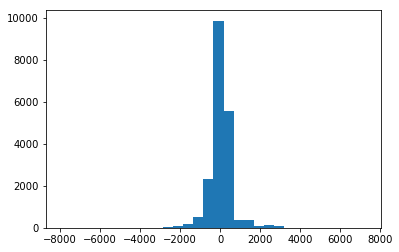

Mean T-fitted - Teff:  -23.1520536804
Standard Deviation:    610.730432331


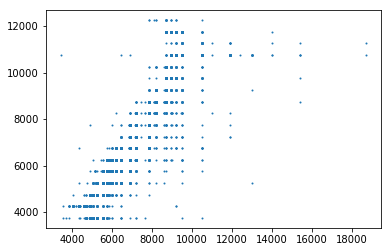

In [681]:
count = 0
Temp_est = np.array([])
Teff_est = np.array([])
Test_SED = ma.masked_array([0.0]*5,mask=False)
for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        if((Jmags.mask[i] == False) and (Kmags.mask[i] == False)):
#            if(Teff[i] > 4000 and Teff[i] < 4500.):
            if(SpTypeN[i] > 4.9 and SpTypeN[i] < 5.05):
                chi2 = np.zeros(len(Temp_SED))
                Test_SED[0] = ma.masked_array(Bmags[i]-Gmags[i])
                Test_SED[1] = ma.masked_array(Vmags[i]-Gmags[i])
                Test_SED[2] = ma.masked_array(Jmags[i]-Gmags[i])
                Test_SED[3] = ma.masked_array(Hmags[i]-Gmags[i])
                Test_SED[4] = ma.masked_array(Kmags[i]-Gmags[i])
                for j in range(0,len(Temp_SED)):
                    Template = Tsed[j, : ]
                    for k in range(0,5):
                        if(Test_SED.mask[k] == False):
                            chi2[j] = chi2[j] + (Test_SED[k]-Template[k])*(Test_SED[k]-Template[k])/(0.1*0.1)/5
                min_chi = np.where(chi2 == chi2.min())
                j = min_chi[0]
                Temp_est = np.append(Temp_est,Temp_SED[j[0]])
                Teff_est = np.append(Teff_est,Teff[i])
                print(i,chi2[j[0]],Temp_est[count],Teff[i])
                count = count + 1
print(len(Temp_est))
Tdiff = Temp_est - Teff_est
plt.hist(Tdiff,bins=30)
plt.show()
print("Mean T-fitted - Teff: ", np.mean(Tdiff))
print("Standard Deviation:   ", np.std(Tdiff))
plt.scatter(Teff_est,Temp_est,s=1.0)
plt.show()

0


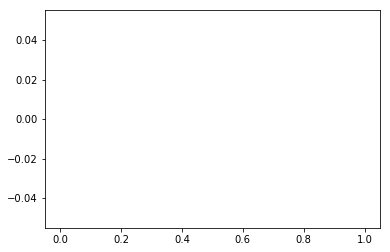

Mean T-fitted - Teff:  nan
Standard Deviation:    nan


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [659]:
count = 0
Temp_est = np.array([])
Teff_est = np.array([])
Test_SED = ma.masked_array([0.0]*5,mask=False)
for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        if((Jmags.mask[i] == False) and (Kmags.mask[i] == False)):
            if(JmG[i] < -1.30 and Gmags[i] < 2.5):
                chi2 = np.zeros(len(Temp_SED))
                Test_SED[0] = ma.masked_array(Bmags[i]-Gmags[i])
                Test_SED[1] = ma.masked_array(Vmags[i]-Gmags[i])
                Test_SED[2] = ma.masked_array(Jmags[i]-Gmags[i])
                Test_SED[3] = ma.masked_array(Hmags[i]-Gmags[i])
                Test_SED[4] = ma.masked_array(Kmags[i]-Gmags[i])
                for j in range(0,len(Temp_SED)):
                    Template = Tsed[j, : ]
                    for k in range(0,5):
                        if(Test_SED.mask[k] == False):
                            chi2[j] = chi2[j] + (Test_SED[k]-Template[k])*(Test_SED[k]-Template[k])/(0.1*0.1)/5
                min_chi = np.where(chi2 == chi2.min())
                j = min_chi[0]
                Temp_est = np.append(Temp_est,Temp_SED[j[0]])
                Teff_est = np.append(Teff_est,Teff[i])
                print(i,SpType[i],chi2[j[0]],Temp_est[count],Teff[i])
                count = count + 1
print(len(Temp_est))
Tdiff = Temp_est - Teff_est
plt.hist(Tdiff,bins=15)
plt.show()
print("Mean T-fitted - Teff: ", np.mean(Tdiff))
print("Standard Deviation:   ", np.std(Tdiff))

In [607]:
x = ma.masked_array([1]*10, mask=False)
print(x)
print(x.mask)
x.mask[3] = True
print(x.mask)
print(x)

[1 1 1 1 1 1 1 1 1 1]
[False False False False False False False False False False]
[False False False  True False False False False False False]
[1 1 1 -- 1 1 1 1 1 1]


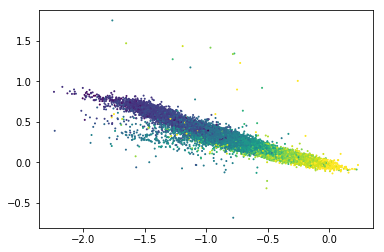

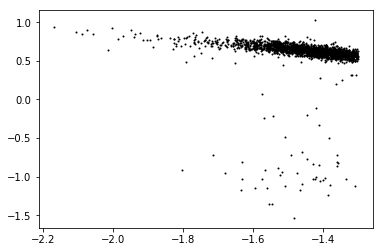

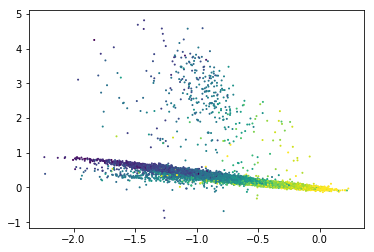

In [621]:
JmK = Jmags - Kmags
plt.scatter(JmG,JmK,s=1.0,c=Teff,vmin=3500,vmax=10000)
plt.show()
for i in range(0,len(Source)):
    if(JmG[i] < -1.30 and Gmags[i] < 2.5):
        JmK.mask[i] = False
    else:
        JmK.mask[i] = True
plt.scatter(JmG,JmK,s=1.0,c='black')
plt.show()
for i in range(0,len(Source)):
    if(JmK.mask[i]):
        JmK.mask[i] = False
    else:
        JmK.mask[i] = True
plt.scatter(JmG,JmK,s=1.0,c=Teff,vmin=3500,vmax=10000)
plt.show()

In [658]:
count = 0
for i in range(0,len(SpTypeN)):
    if(SpTypeN[i] < -10.):
        count = count + 1
        print(SpTypeN[i])
print(count)

-20.0
-20.0
-20.0
-20.0
-20.0
-11.0
-20.0
-20.0
-20.0
-20.0
-17.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-17.0
-30.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-17.0
-20.0
-15.0
-20.0
-20.0
-20.0
-15.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-30.0
-20.0
-20.0
-17.0
-20.0
-20.0
-20.0
-17.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-15.0
-20.0
-20.0
-20.0
-15.0
-20.0
-20.0
-20.0
-20.0
-20.0
-17.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-15.0
-20.0
-20.0
-15.0
-30.0
-20.0
-20.0
-20.0
-30.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-30.0
-20.0
-20.0
-15.0
-30.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-17.0
-30.0
-30.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-30.0
-20.0
-20.0
-20.0
-15.0
-20.0
-20.0
-20.0
-20.0
-20.0
-30.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-30.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-30.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-15.0
-20.0
-20.0
-20.0
-20.